# Matplotlib

Matplotlib is a comprehensive library to create visualizations in Python. It allows you to create publication quality plots, interactive figures, and it can also interact with third party packages to export in many file formats, layouts and visual styles.
One of the most important characteristics from Matplotlib is its capacity to work well with many operating systems and graphic backends. 

We can import the library using `matplotlib`, in this case we will abbreviate the library import as `mpl`.

In [ ]:
!pip install matplotlib # run this if you get a ModuleNotFoundError

In [7]:
import matplotlib.pyplot as plt

#### Style declaration
We will use the `plt.style` declaration to use the appropiate style for our figures.

To learn more about Matplot styles you can follow [this link](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

You will also see lots of new terms when refering to the figures, such as `figure, legend, tick, line, label, axes, spines`. Lets look at this in an image. To check the full image and code you can follow [this link](https://matplotlib.org/stable/gallery/showcase/anatomy.html) to follow the Matplotlib documentation.

<img src="anatomy.webp" width=400>

In [11]:
plt.style.use('classic')

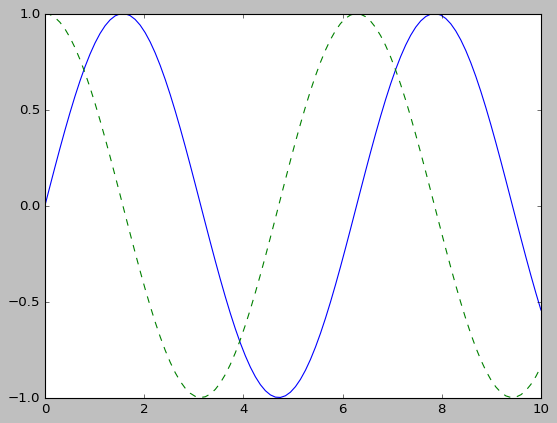

In [12]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

In [14]:
#Save figure in the current directory
fig.savefig('my_figure.png')

We can also open a saved image. This opens the file as an image and not as a Matplotlib figure, this means it is not interactive.

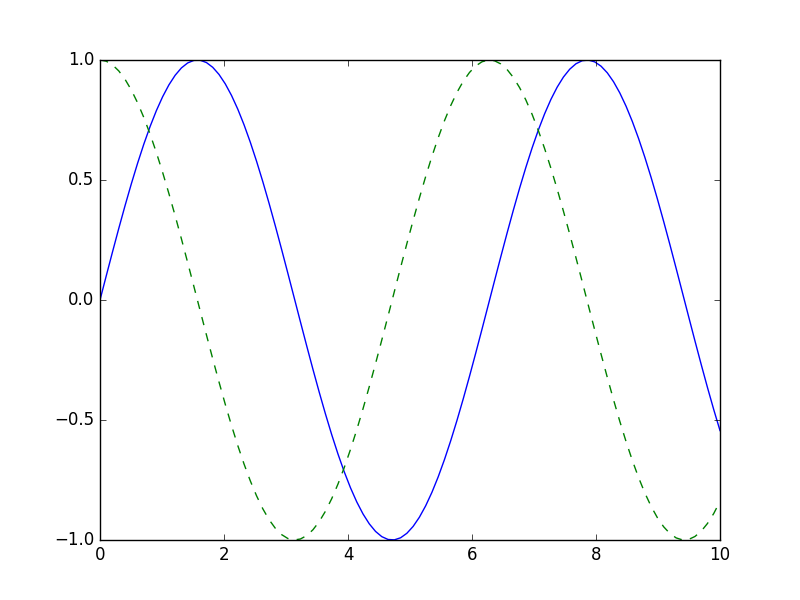

In [15]:
from IPython.display import Image
Image('my_figure.png')

**Labeling figures**

We can label graphs, with elements such as titles, axis labels, and legends.

The simplest methods to do this are:

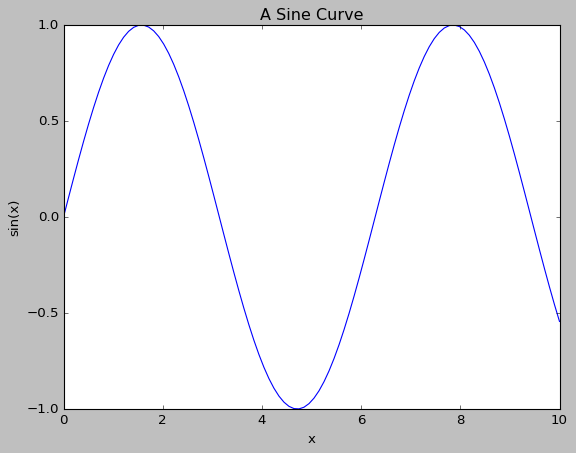

In [16]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

Label position, size and style can be adjusted by using optional function arguments. We can adjust a line color and line type, for example, using `-g` and `:b` which mean "solid green line" and "dotted blue line" as you can see in our figure. For more examples on this you can check the full [Matplotlib documentation on the .plot function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

When we show multiple lines in a single axis we can create a `legend` which shows which line corresponds to which data and line type. We just need to call `plt.legend()` and Matplot library will create our legend using the label we specified in the `plot` function.

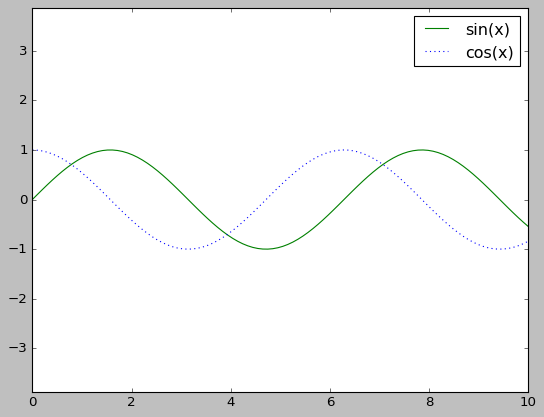

In [19]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

## Plot types in Matplotlib

The most simple visualization is a single plot, usually x vs y. 

We first start by creating a figure, and then an axis. We will also switch the style for variation:

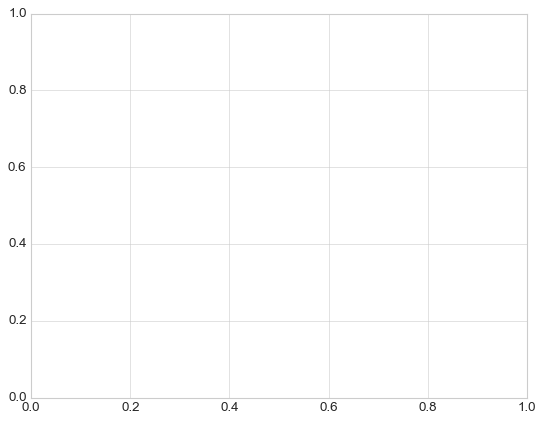

In [20]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()

Then we add the information we want to plot:

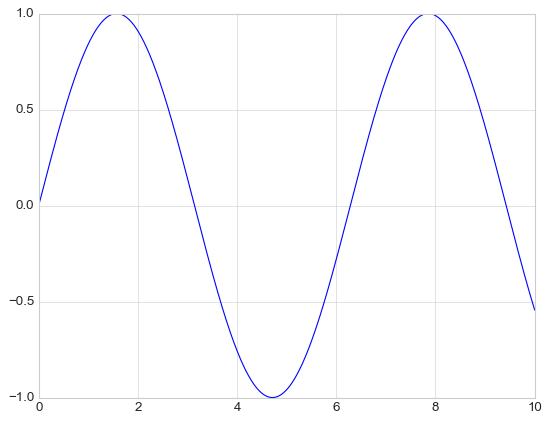

In [21]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x));

If we want to create a single figure with multiple lines, we can call the plot function multiple times, passing the different data we want to plot.

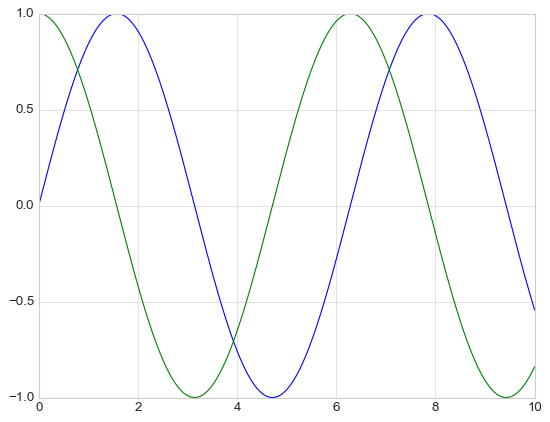

In [22]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

The `plt.plot()` function, has optional arguments, as we have seen. We can use the `color` keyword, that takes a string character that represents a color. We can specify this color in multiple formats:

For the full documentation on color specification follow [this link to the color documentation](https://matplotlib.org/stable/tutorials/colors/colors.html)

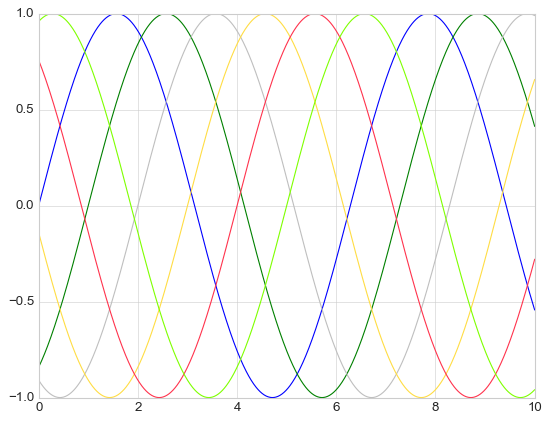

In [12]:
plt.plot(x, np.sin(x - 0), color='blue')        # color name
plt.plot(x, np.sin(x - 1), color='g')           # shorthand color code
plt.plot(x, np.sin(x - 2), color='0.75')        # greyscale
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex  (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # HTML supported colors

If no color is specified, Matplot will assign a default color when multiple lines are present.

Similarly, the linestyle can also be adjusted using the `linestyle` argument.

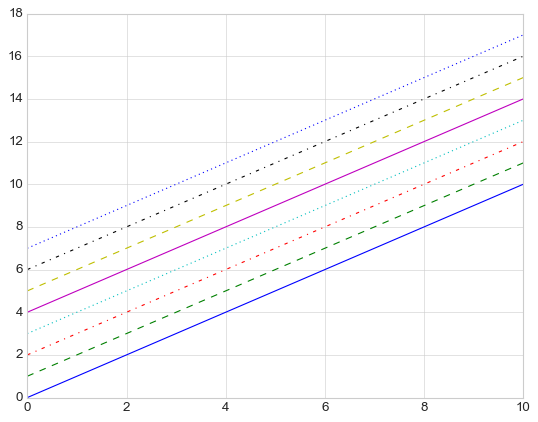

In [23]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# Can also be specified by code
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dot

**Scatter plot**

Another common plot is a scatter plot, closely related with the line plot. Points are represented individually, by circles or other shapes.

The `plt.plot()` function will also produce a scatter plot if a shape is specified:

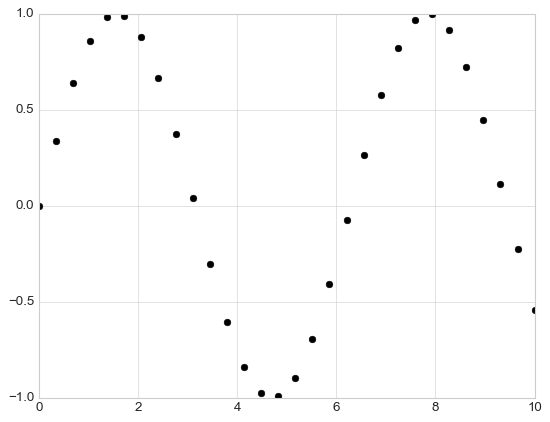

In [24]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

On the previous function, the third positional argument is a character that represents the plotted symbol. This also has its own code system, again, the full list of symbols are listed in the Matplotlib documentation. Here we explore the most common marker types:

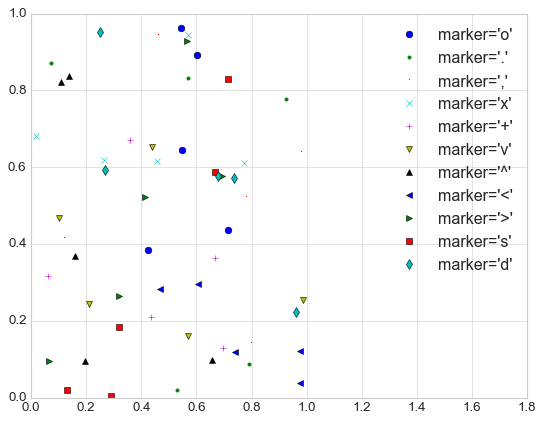

In [15]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

For even more combinations we can use markers with line styless and colors.

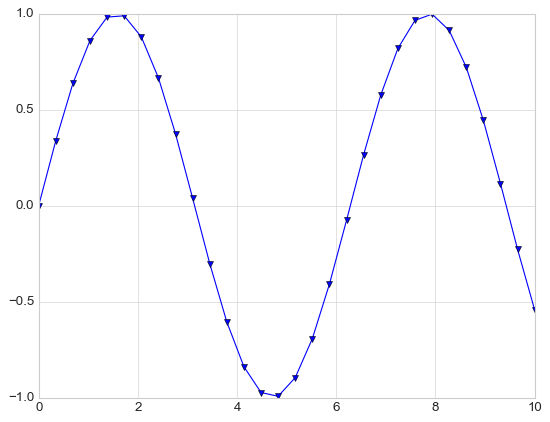

In [17]:
plt.plot(x, y, '-v');

We can also use the `.scatter()` function to create a scatter plot, very similar to `.plot()` function.

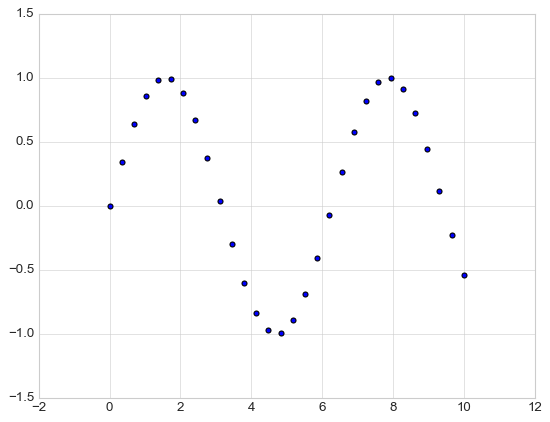

In [18]:
plt.scatter(x, y, marker='o');

The main difference is that `.scatter()` can be used to create diagrams where each individual point has a size, color, border color, and transparency.

Lets create a random scatter plot to demonstrate this, we will use random colors and sizes. To better show our result, we will also use the `alpha` parameter to specify a transparency setting:

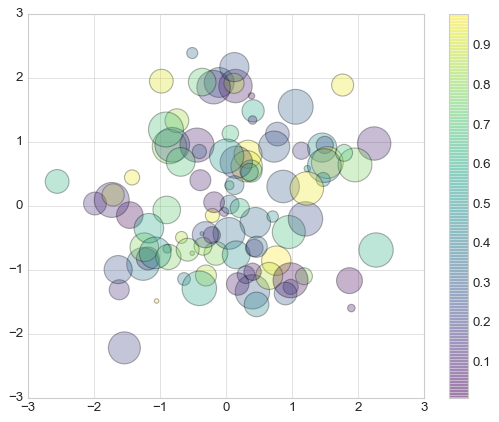

In [19]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis') # cmap = color map
plt.colorbar();  # show color scale

## Error Visualization

When plotting and presenting data, showing errors will transmit a more accurate representation of the data.

We can create a simple error bar by calling the `.errorbar()` function. The parameter `yerr` is in this case the error represented in the y-axis.

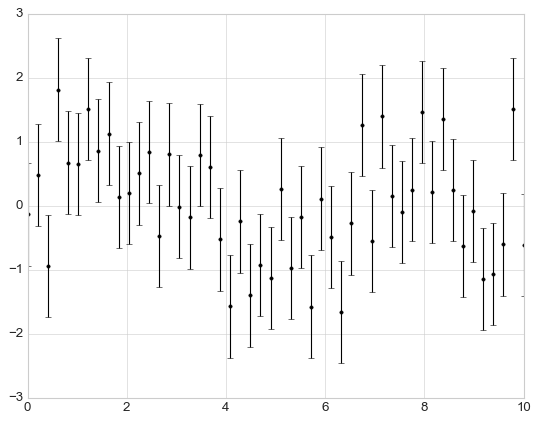

In [20]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

Also the parameter `fmt` is a format code that controls line type and markers. It has the same syntax as the .`plot()` function.

We also have other useful error bar parameters that can be tweaked:

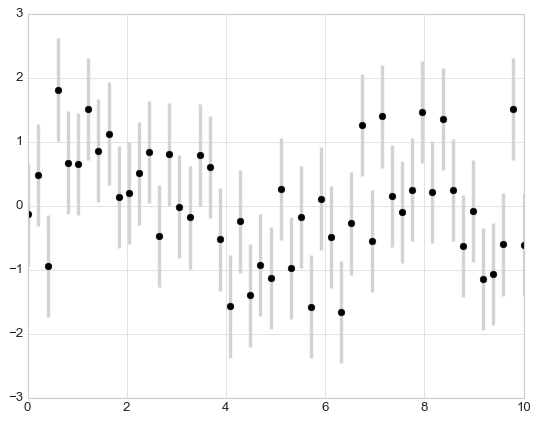

In [21]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

We also have the option to specify horizontal error bars with the `xerr` parameter. Single sided errors and other variants. For time sake we can only cover the most basic ones. But if you are interested, again, the [Matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) is your best friend.

## Custom legends

Legends give meaning to the elements in a plot. We have shown how to create a simple legend, lets expand on this functionality.

The most simple legend we can create is calling the `plt.legend()` function. This will annotate any data with a `label`.

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

%matplotlib inline
import numpy as np

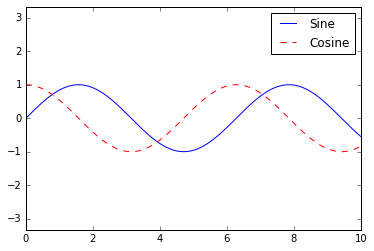

In [2]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal') # Set an equal vertical axis
leg = ax.legend();

We can specify where we want to show our legend

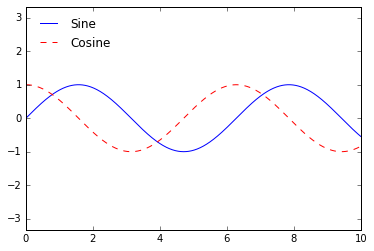

In [3]:
ax.legend(loc='upper left', frameon=False)
fig

We can also use `ncol` to define the number of columns that a legend uses

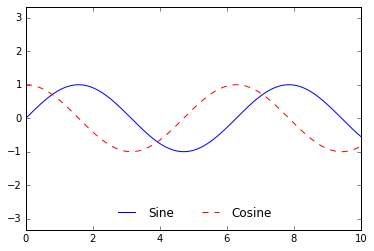

In [4]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

We can also adjust the legend box, change its transparency, or even the border padding.

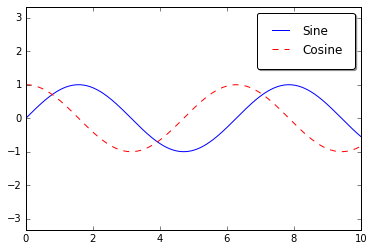

In [5]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

### Selecting elements for a legend

We can adjust which elements and labels are utilized. Since `plt.plot()` can create multiple lines at the same time, it returns a list of the created instances, we can use this list to specify which lines we want to label with labels.

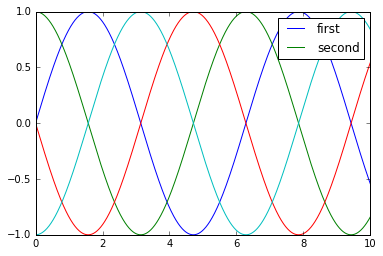

In [6]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

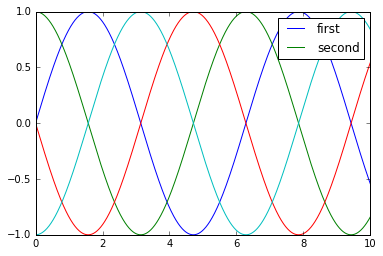

In [8]:
# A different way of doing the same thing
# By default, legend ignores unlabelled elements
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

### Multiple legends

It is also possible to have multiple legends for a single figure.

If we use `legend()` we are limited to creating a single legend per axis. If we need multiple legends we would need to add a second `artist` (this is the name of the object Matplot uses), for this we will call `ax.add_artist()`.

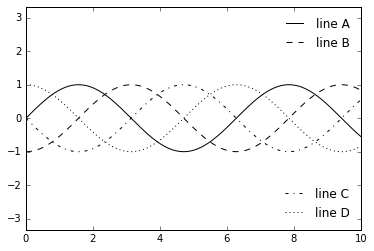

In [9]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

## Practice exercises

Recreate the following plots. Number 5 and 6 will require your to do the Subplot lesson (6b).

1. <img src='https://www.w3resource.com/w3r_images/matplotlib-basic-exercise-1.png' width=400>

2. <img src='https://www.w3resource.com/w3r_images/matplotlib-basic-exercise-2.png' width=400>

x axis values
x = [1,2,3]

y axis values
y = [2,4,1]

3. <img src='https://www.w3resource.com/w3r_images/matplotlib-basic-exercise-6.png' width=400>

line 1 points
x1 = [10,20,30]
y1 = [20,40,10]

line 2 points
x2 = [10,20,30]
y2 = [40,10,30]

4. <img src='https://www.w3resource.com/w3r_images/matplotlib-basic-exercise-8.png' width=400>

5. <img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAe4AAAFQCAYAAAB5151TAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAIABJREFUeJzt3X9wVfX95/HXG5H5quyitiVgCFCU3waRFepWdzZEiOAO%0AUKeUgo5SoO1+Rf0y1fk22tktsO3wo51i8deMrICsozL44yvwbfmhiZkd8QdtEfUrkeoqCFGCSOSb%0AqDQi7/3j3qQ3MSH3JvfmnHPP8zGT8d6Te04+fCby5nXO54e5uwAAQDT0CLoBAAAgfRRuAAAihMIN%0AAECEULgBAIgQCjcAABFC4QYAIEJyWrjNbICZVZrZW2b2ppn9U/L4BWa208z2m9kOM+uTcs7dZvaO%0AmVWbWVku2wcAQNRYLudxm1k/Sf3cfa+Z9Zb0F0kzJM2T9Im7/8bMyiVd4O53mdkoSY9JGi9pgKTn%0AJQ11JpsDACApx4nb3Y+4+97k6wZJ1UoU5BmSNiQ/tkHS95Kvp0va6O6n3P2ApHckTchlGwEAiJJu%0Ae8ZtZoMljZX0iqQCd6+VEsVdUt/kxwolHUo5rSZ5DAAAqJsKd/I2+VOSFiWTd+tb39wKBwAgDT1z%0A/QPMrKcSRftRd9+cPFxrZgXuXpt8Dn40ebxGUlHK6QOSx1pfk0IPAIgkd7eunN8diXudpH3uvjrl%0A2BZJP0q+nitpc8rx2WbWy8y+LekSSbvbuqi785WDr8WLFwfehnz8ol/p26h90a/Z+Tp9uuX7bMj1%0AdLCrJN0oqdTMXjOzPWY2RdJKSZPNbL+kayStkCR33ydpk6R9kv4oaaFn608KAEA3aWiQFi6U7rkn%0A+9fO6a1yd98l6ax2vj2pnXOWS1qes0YBAJBDlZXSggXSxInS/PnZv37On3EjWkpKSoJuQl6iX3OH%0Avs0N+jVz9fXSz38u/eu/Sg89JF13XW5+Tk4XYMkVM+MOOgAgNFJT9qpV0vnnt/05M5N3cXAaiRsA%0AgE5KTdlr1khTp+b+Z7LJCAAAnVBZKY0ZIzU2Sm++2T1FWyJxAwCQkSBSdioSNwAAaQoqZacicQMA%0A0IGgU3YqEjcAAGfQlLL/9rfgUnYqEjcAAG3ornnZmSJxAwDQSuuUHZaiLZG4AQBoFtaUnYrEDQCA%0Awp2yU5G4AQCxVl8vlZdLW7eGN2WnInEDAGKrKWWfPBnulJ2KxA0AiJ0oPMtuD4kbABArUXmW3R4S%0ANwAgFqKcslORuAEAeS/qKTsViRsAkLcaGhIpOyojxtNB4gYA5KXKSqm4OFojxtNB4gYA5JV8TNmp%0ASNwAgLyRryk7FYkbABB5+TJiPB0kbgBApOXTiPF0kLgBAJEUp5SdisQNAIicppTd2BiPlJ2KxA0A%0AiIzUlL1mjTR1atAt6n4kbgBAJLR+lh3Hoi2RuAEAIUfKbonEDQAILVL215G4AQChE9cR4+kgcQMA%0AQiVu87IzReIGAIQCKTs9JG4AQOBI2ekjcQMAAsOI8cyRuAEAgaioaLn6GUU7PSRuAEC3ImV3DYkb%0AANBtKioS+2UzL7vzSNwAgJxjxHj2kLgBADnVOmVTtLuGxA0AyAlSdm6QuAEAWce87NwhcQMAsoaU%0AnXskbgBAVpCyuweJGwDQJfX1Unm5tHUrKbs7kLgBAJ3WlLJPniRldxcSNwAgYzzLDg6JGwCQEZ5l%0AB4vEDQBICyk7HEjcAIAOkbLDg8QNAGhXQ0MiZTNiPDxI3ACANlVWJtYYZ8R4uJC4AQAtMC873Ejc%0AAIBmzMsOPxI3AIAR4xFC4gaAmGPEeLSQuAEgpkjZ0UTiBoAYakrZjY2k7KghcQNAjKSm7DVrpKlT%0Ag24RMkXiBoCYaP0sm6IdTSRuAMhzpOz8QuIGgDxGys4/JG4AyEOMGM9fOU3cZrbWzGrN7I2UY4vN%0A7LCZ7Ul+TUn53t1m9o6ZVZtZWS7bBgD5innZ+c3cPXcXN7taUoOk/+PuY5LHFkuqd/dVrT47UtLj%0AksZLGiDpeUlDvY0GmllbhwEg1kjZ4WdmcnfryjVymrjd/UVJdW18q61Gz5C00d1PufsBSe9ImpDD%0A5gFA3iBlx0dQg9NuM7O9ZvawmfVJHiuUdCjlMzXJYwCAdtTXS7fcIs2dKz34oLRunXT++UG3CrkU%0AROF+UNIQdx8r6Yik3wXQBgCIvNarnzFiPB66fVS5u3+c8vZ/S9qafF0jqSjlewOSx9q0ZMmS5tcl%0AJSUqKSnJWhsBIMyYlx0dVVVVqqqqyuo1czo4TZLMbLCkre5enHzfz92PJF//TNJ4d7/BzEZJekzS%0Ad5S4Rf6cGJwGAC1UVkoLFkgTJ0qrVnFbPGqyMTgtp4nbzB6XVCLpG2b2gaTFkiaa2VhJpyUdkPTf%0AJcnd95nZJkn7JH0paSHVGQAS6uul8nJp61ZGjMddzhN3LpC4AcQJKTt/hD5xAwA6j3nZaAtrlQNA%0ACDEvG+0hcQNAiDBiHB0hcQNASDAvG+kgcQNAwEjZyASJGwACRMpGpijcEXT48GGVlpZq9OjRKi4u%0A1r333itJqqurU1lZmYYPH65rr71WJ06caD5n+fLlGjp0qEaOHKmdO3cG1XQASa3XGF+7lmleSA+F%0AO4J69uypVatW6a233tLLL7+sBx54QG+//bZWrFihSZMmaf/+/SotLdXy5cslSfv27dOmTZtUXV2t%0Abdu2aeHChWIePBCc1iPGSdnIBIU7gvr166exY8dKknr37q2RI0fq8OHD2rx5s+bOnStJmjt3rp59%0A9llJ0pYtWzR79mz17NlTgwcP1tChQ7V79+7A2g/EVWrKfuABdvJC51C4I+7AgQPau3evrrzyStXW%0A1qqgoEBSorgfPXpUklRTU6Oior/v31JYWKiamnb3bwGQA8zLRrYwqjzCGhoaNHPmTK1evVq9e/eW%0AWctV9Fq/T0dnzkF6eDwRTw0NiRHjrDGObCFxR9SpU6c0c+ZM3XTTTZoxY4YkqaCgQLW1tZKkI0eO%0AqG/fvpISCfvQoUPN5x4+fFiFhYXtXtvdu/S1ePHiUFwjyLZ8/LHrhz90DR3q2rWLgh1XlZVScbF0%0A8iQpG9lD4Y6o+fPna9SoUVq0aFHzsenTp+uRRx6RJG3YsKG5oE+fPl0bN25UY2Oj3n//fb377rua%0AMGFCEM2OhWeeSfxlXVgo7d0rffe7QbcI3a2+Xlq4kGfZyA1ulUfQrl279Nhjj6m4uFiXX365zEzL%0Ali1TeXm5Zs2apXXr1mnQoEHatGmTJGnUqFGaNWuWRo0apbPPPlsPPvggt8Rz4Ngx6bbbpNdek556%0ASrrqqqBbhCCk7uT15psUbGQf23qiheSWc126RlVVlUpKSgK/Rne25ZlnpFtvlW64Qfr1r6Vzzmn5%0A/Wz0K8KNnbyQjmxs60nhRgsUmMw0pew9e6T169tP2fRrfmO/bKQrG4WbZ9xAJ6U+y379dW6NxxHz%0AshEEnnEDGTp2TLr9dukvf+FZdpzxLBtBIXEDGXj66UTKvuiixIhxinb8NDQwYhzBInEDaUgdMf70%0A00zxiitSNsKAxB1RCxYsUEFBgcaMGdN8bOnSpRowYIDGjRuncePGafv27c3fY3ewzmNeNkjZCBMS%0Ad0TNmzdPt99+u26++eYWx++44w7dcccdLY5VV1c37w52+PBhTZo0Se+88w5zuTuQ+iyblB1fpGyE%0ADYk7oq6++mpdcMEFXzve1pSjzZs3sztYhppSdtOzbIp2/DBiHGFF4c4z999/v8aOHasf//jHOnHi%0AhCR2B8vEsWPSnDnSXXclRoz/7nfSuecG3Sp0N3byQphRuPPIwoUL9d5772nv3r3q16+f7rzzzqCb%0AFCmpKZt52fFEykYU8Iw7j3zrW99qfv2Tn/xE06ZNk5T57mBLlixpfl1SUpKVpUfDLBfzsquqqlRV%0AVdX1C6HbND3LLi3lWTbCjSVPI+zAgQOaNm2a3nzzTUmJrTz79esnSbrnnnv0pz/9SY8//rj27dun%0AG2+8Ua+++qpqamo0efLkdgenxW1pztQ1xn/1q9zdFo9bv0ZJ6hrja9ZIU6cG3SLks2wseUrijqgb%0AbrhBVVVV+uSTTzRw4EAtXbpUL7zwgvbu3asePXpo8ODBeuihhySxO1hbmJcNiRHjiCYSN1qIQzLs%0AaCevXIhDv0YJKRtBIXEDGWCNcUikbEQfo8oRC00jxvv3Z43xuGLEOPIFiRt5jZQNiZSN/ELiRt5i%0AXjZI2chHJG7knaYR43v2kLLjjJSNfEXijqi2dgerq6tTWVmZhg8frmuvvbZ5yVMpPruDpe7kRcqO%0Ap9SU/eCDpGzkHwp3RM2bN087duxocWzFihWaNGmS9u/fr9LSUi1fvlyStG/fvubdwbZt26aFCxfm%0A3dSk1DXGn346scZ4d0zzQrhUVCTWGG9sTKRspnkhH1G4I6qt3cE2b96suXPnSpLmzp2rZ599VpK0%0AZcuWvN4d7JlnEn9ZNz3LZjGV+GlK2T/6USJlr11Lykb+onAH6L777lNdXV3Wrnf06FEVFBRIkvr1%0A66ejR49Kyt/dwZpS9t13S08+ScqOq4qKxOORpp28SNnIdxTuANXW1mr8+PGaNWuWtm/fnvXb1/m8%0ArGlqymZedjy1Ttk8y0ZcMKo8QL/+9a/1q1/9Sjt37tT69et12223adasWVqwYIEuvvjijK9XUFCg%0A2tpaFRQU6MiRI+rbt6+k/NodLHVe9pNPhrdgsztYblVUsJMX4ou1ykPg9ddf1/r167V9+3ZNnDhR%0Ar7zyiiZPnqzf/OY3Zzyv9e5g5eXluvDCC1VeXq6VK1eqrq5OK1asyJvdwYJYYzxbwtyvUZK6xvhD%0AD0nXXRd0i4DMZGOtcrl75L4SzY6+3//+9z5u3DgvKyvzTZs2eWNjo7u7f/XVVz5kyJAznjtnzhzv%0A37+/9+rVy4uKinzdunV+/Phxv+aaa3zYsGE+efJkr6ura/78smXL/OKLL/YRI0b4jh072r1uGPv2%0A44/dZ892HzbM/cUXg25N54SxX6OmosJ98GD3efPcU361gUhJ/l3QpRpI4g7Q4sWLNX/+fA0aNOhr%0A36uurtbIkSO7vU1hS4ZRTtmpwtavUULKRj7JRuKmcKOFsBSY1P2y16+P/hSvsPRr1KSufrZqFc+y%0AEX3ZKNyMKkfopK5+tndv9Is2MldfLy1cyBrjQFsYVY7QaBoxzhrj8cYa48CZkbgRCszLBjt5Aekh%0AcSNQqc+yn3qK2+JxRcoG0kfiRmB4lg1SNpA5EnceGjx4sPr06aMePXro7LPP1u7du1VXV6cf/vCH%0AOnjwoAYPHqxNmzapT58+gbQvdfUznmXHFykb6BwSdx7q0aOHqqqq9NprrzXvAtbelp/drSllN+3k%0ARdGOn4YGRowDXUHhzkPurtOnT7c41t6Wn90ldb/sp55iJ6+4qqxM/MPt5MlEymYxFSBzFO48ZGaa%0APHmyxo8fr4cffliSmjcfkVpu+dkdnn468Zd1//6MGI8r5mUD2cMz7jy0a9cu9e/fXx9//LHKyso0%0AfPjwr20ocqYtP7O1O1jqiPGnn47X4DN2B/s7nmUD2cWSp3lu6dKl6t27tx5++GFVVVU1b/k5ceJE%0AVVdXf+3z2VqaM1/WGM+WOC55yhrjwNex5Cm+5vPPP1dDQ4Mk6bPPPtPOnTtVXFys6dOn65FHHpEk%0AbdiwQTNmzMjJzz92TJo9W7r77kTK5ll2PFVWJhbU+dvfeJYNZBu3yvNMbW2trr/+epmZTp06pRtv%0AvFFlZWW64oorNGvWLK1bt06DBg3Spk2bsv6zU1P2+vUU7DgiZQO5x61ytNCZW7qpa4znw05euRCH%0AW+VNz7JLSxN3WniWDXwdt8oRuNZrjFO04yd19bMHH5TWrqVoA7nErXJ0SuudvCjY8cSIcaD7kbiR%0AsdTVz0jZ8dQ6ZTMvG+g+JG6krWleNvtlxxspGwgWiRtpab2TF0U7ftjJCwiHnBZuM1trZrVm9kbK%0AsQvMbKeZ7TezHWbWJ+V7d5vZO2ZWbWZluWxbHG3fvl0jRozQsGHDtHLlyrTOaZqXnbrG+Lnn5rih%0ACB3mZQPhkevEvV7Sta2O3SXpeXcfLqlS0t2SZGajJM2SNFLSVEkP2pnW5URGTp8+rdtuu007duzQ%0AW2+9pSeeeEJvv/32Gc9pWmO8sDCznbyysdRntpYLDVNbooiUDYRPTgu3u78oqa7V4RmSNiRfb5D0%0AveTr6ZI2uvspdz8g6R1JE3LZvjjZvXu3hg4dqkGDBunss8/W7NmztXnz5jY/25Syf/GLzq1+FqZi%0AGaa2RA0pGwinDgu3md1uZhdk8Wf2dfdaSXL3I5L6Jo8XSjqU8rma5DFkQU1NjYqKiprfDxgwQDU1%0ANW1+NvVZNiPG44cR40C4pZO4CyT9ycw2mdmUHNy+zu/lpCKI/bLjqyllNzYmUvbUqUG3CEBrHU4H%0Ac/f/YWb/U1KZpHmS7jezTZLWuvv/68TPrDWzAnevNbN+kpo2hq6RVJTyuQHJY23K1taTcVFYWKgP%0APvig+f3hw4dVWNj2DY2rr+76v82WLl0aimtk6zrZaktYpa4xvmYNBRvIllxs8Zv2WuVmdpkShXuK%0ApBckXSnpOXf/eQfnDZa01d2Lk+9XSjru7ivNrFzSBe5+V3Jw2mOSvqPELfLnJA1ta1Fy1irP3Fdf%0AfaXhw4eroqJC/fv314QJE/TEE09o5MiRQTcNAUudl71qFbfFgVzKxlrlHSZuM1sk6WZJxyQ9LOmf%0A3f1LM+uhxACydgu3mT0uqUTSN8zsA0mLJa2Q9KSZzZd0UImR5HL3fckkv0/Sl5IWUp2z56yzztL9%0A99+vsrIynT59WgsWLKBox1x9vVReLm3dyk5eQJR0mLjNbKmkde5+sI3vjXT36lw17gxtoqYDXUDK%0ABoLRLbuDufvitop28nvdXrSRG51ZnOXw4cMqLS3V6NGjVVxcrHvvvVeSVFdXp7KyMg0fPlzXXnut%0ATpw40eG1Tp8+rXHjxmn69OmdvsaJEyf0gx/8QCNHjtTo0aP16quvZnyde+65R5deeqnGjBmjG2+8%0AUY2NjWldY8GCBSooKNCYMWOaj53pvOXLl2vo0KEaOXKkdu7c2eGfLVuYlw1EH0ueolOLs0hSz549%0AtWrVKr311lt6+eWX9cADD+jtt9/WihUrNGnSJO3fv1+lpaVavnx5h9davXq1Ro0a1fy+M9dYtGiR%0ArrvuOlVXV+v111/XiBEjMrrOhx9+qPvuu0979uzRG2+8oVOnTumJJ55I6xrz5s3Tjh07Whxr77x9%0A+/Zp06ZNqq6u1rZt27Rw4cJu2aubedlAnnD3yH0lmo1sefnll33KlCnN75cvX+4rVqzI+DozZszw%0A5557zocPH+5Hjhxxd/ePPvrIhw8ffsbzDh065JMmTfIXXnjBp02b5u6e8TVOnDjhQ4YM+drxTK5T%0AU1PjAwcO9OPHj/uXX37p06ZNy+jPc+DAAS8uLu7wZ7fu3ylTpvgrr7xyxj9fV/z7v7v/4z+6Dxjg%0A/sc/5uzHAEhDsn51qQaSuJHR4iztOXDggPbu3asrr7xStbW1KigokCT169dPR48ePeO5P/vZz/Tb%0A3/5WqUsEZHqN999/X9/85jc1b948jRs3Tj/96U/1+eefZ3Sdiy66SHfeeacGDhyowsJC9enTR5Mm%0ATcq4LU2OHj3a5nmt+7uwsDDj/k4X87KB/EPhRpc1NDRo5syZWr16tXr37q3Wa/Scac2eP/zhDyoo%0AKNDYsWPPeLu4o3V/Tp06pT179ujWW2/Vnj17dN5552nFihUZteXTTz/V5s2bdfDgQX344Yf67LPP%0A9Nhjj2V0jTPpzqX3W69+tnYtz7KBfEHhRkaLs7R26tQpzZw5UzfddJNmzJghSSooKFBtba0k6ciR%0AI+rbt2+75+/atUtbtmzRkCFDNGfOHFVWVuqmm25Sv3790r6GlLhLUFRUpCuuuEKS9P3vf1979uzJ%0AqC3PP/+8hgwZogsvvFBnnXWWrr/+er300ksZXSNVe+cVFhbq0KG/r+6bSX+ng5QN5DcKNzR+/Hi9%0A++67OnjwoBobG7Vx48bm0d0dmT9/vkaNGqVFixY1H5s+fboeeeQRSdKGDRuaC3pbli1bpg8++EDv%0AvfeeNm7cqNLSUj366KOaNm1a2teQEkWyqKhIf/3rXyVJFRUVGj16dEZtGThwoF555RWdPHlS7q6K%0AigqNGjUq7Wv438dgnLEfpk+fro0bN6qxsVHvv/++3n33XU2Y0PX9dEjZQEx09SF5EF9icFrWbdu2%0AzYcNG+aXXHKJL1++PK1zXnzxRe/Ro4dfdtllPnbsWL/88st927Zt/sknn/g111zjw4YN88mTJ3td%0AXV1a16uqqmoenNaZa+zdu9evuOIKv+yyy/z666/3Tz/9NOPrLFmyxEeMGOHFxcV+8803e2NjY1rX%0AmDNnjvfv39979erlRUVFvm7dOj9+/Hi75y1btswvvvhiHzFihO/YsSOt/jmTigr3wYPd581zT7O7%0AAQRAWRiclvaSp2HCAixAQuoa46x+BoRftyzAAiCcmJcNxFOHa5UDCJeGhkTKZo1xIJ5I3ECEVFZK%0AxcXSyZOkbCCuSNxABLCTF4AmJG4g5JqeZZOyAUgkbiC0GDEOoC0kbiCEGDEOoD0kbiBESNkAOkLi%0ARqT8+c9/1mWXXabGxkZ99tlnuvTSS7Vv376gm5UVpGwA6WDlNETOL3/5S33xxRf64osvVFRUpPLy%0A8qCb1CXMywbiIxsrp1G4ETlffvmlxo8fr3POOUcvvfRSt26XmW2VldKCBdLEidKqVWwKAuS7bBRu%0AnnEjco4dO6aGhgadOnVKJ0+e1DnnnBN0kzJGygbQWSRuRM6MGTM0Z84cvf/++/rwww913333Bd2k%0AjJCygfgicSN2Hn30UfXq1UuzZ8/W6dOnddVVV6mqqkolJSVBN61DjBgHkA0kbqAbkLIBSCRuIPRI%0A2QCyjXncQI40zctubGReNoDsIXEDWZaasteskaZODbpFAPIJiRvIotarn1G0AWQbiRvIAlI2gO5C%0A4ga6iJQNoDuRuIFOYsQ4gCCQuIFOYCcvAEEhcQMZIGUDCBqJG0gTKRtAGJC4gQ4wYhxAmJC4gTOo%0AqGi5+hlFG0DQSNxAG0jZAMKKxA20UlEhFRczLxtAOJG4gSRGjAOIAhI3oK+nbIo2gLAicSPWSNkA%0AoobEjdhiXjaAKCJxI3ZI2QCijMSNWCFlA4g6Ejdiob5eKi+Xtm4lZQOINhI38l5Tyj55kpQNIPpI%0A3MhbPMsGkI9I3MhLPMsGkK9I3MgrpGwA+Y7EjbxBygYQByRuRF5DQyJlM2IcQByQuBFplZWJNcYZ%0AMQ4gLkjciCTmZQOIKxI3Iod52QDijMSNyGDEOACQuBERjBgHgAQSN0KNlA0ALZG4EVpNKbuxkZQN%0AAE1I3Aid1JS9Zo00dWrQLQKA8CBxI1RaP8umaANASyRuhAIpGwDSQ+JG4EjZAJA+EjcCw4hxAMhc%0AYInbzA6Y2etm9pqZ7U4eu8DMdprZfjPbYWZ9gmofcot52QDQOebuwfxgs/ck/Sd3r0s5tlLSJ+7+%0AGzMrl3SBu9/VxrkeVLvRNaRsAHFmZnJ368o1gnzGbW38/BmSNiRfb5D0vW5tEXKKlA0AXRd04v5U%0A0leSHnL3h82szt0vSPnMcXe/sI1zSdwRwohxAEjIRuIOcnDaVe7+kZl9S9JOM9svqXU1pjpHXGWl%0AtGCBVFqaSNnnnx90iwAg2gIr3O7+UfK/H5vZs5ImSKo1swJ3rzWzfpKOtnf+kiVLml+XlJSopKQk%0Atw1GRkjZACBVVVWpqqoqq9cM5Fa5mZ0rqYe7N5jZeZJ2Sloq6RpJx919JYPToqspZU+cKK1aRcoG%0AgCbZuFUeVOH+tqR/UeJWeE9Jj7n7CjO7UNImSUWSDkqa5e6ftnE+hTuE6uul8nJp61ZGjANAWyJb%0AuLuKwh0+pGwA6FjUB6chDzAvGwC6F2uVo9OYlw0A3Y/EjYwxYhwAgkPiRkaaUnZjIzt5AUAQSNxI%0ACykbAMKBxI0OkbIBIDxI3GgXKRsAwofEjTa1HjFO0QaAcCBxowXmZQNAuJG40Yx52QAQfiRuqKEh%0AkbJZYxwAwo/EHXOVlVJxsXTyJCkbAKKAxB1TpGwAiCYSdwyRsgEgukjcMULKBoDoI3HHBCkbAPID%0AiTvPkbIBIL+QuPMYKRsA8g+JOw+RsgEgf5G48wwpGwDyG4k7T5CyASAeSNx5gJQNAPFB4o4wdvIC%0AgPghcUcUO3kBQDyRuCOGlA0A8UbijpCmlN3YSMoGgLgicUdAaspes0aaOjXoFgEAgkLiDrnWz7Ip%0A2gAQbyTukCJlAwDaQuIOIVI2AKA9JO4QYcQ4AKAjJO6QYF42ACAdJO6AkbIBAJkgcQeIlA0AyBSJ%0AOwCMGAcAdBaJu5tVVLRc/YyiDQDIBIm7m5CyAQDZQOLuBhUVif2ymZcNAOgqEncOMWIcAJBtJO4c%0AaZ2yKdoAgGwgcWcZKRsAkEsk7ixiXjYAINdI3FlAygYAdBcSdxeRsgEA3YnE3Un19VJ5ubR1Kykb%0AANB9SNyd0JSyT54kZQMAuheJOwM8ywYABI3EnSaeZQMAwoDE3QFSNgAgTEjcZ0DKBgCEDYm7DQ0N%0AiZTNiHEAQNiQuFuprEysMc6IcQBAGJG4k5iXDQCIAhK3mJcNAIiOWCduRowDAKImtombEeMAgCiK%0AXeImZQMAoixWibspZTc2krIBANEUi8SdmrLXrJGmTg26RQAAdE7eJ+7Wz7Ip2gCAKMvbxE3KBgDk%0Ao7xM3KRsAEC+yqvEzYhxAEC+C2XiNrMpZva2mf3VzMrTOYd52QCAOAhd4TazHpLul3StpNGS5pjZ%0AiPY+X18v3XKLNHeu9MAD0rp10vnnd1dr809VVVXQTchL9Gvu0Le5Qb+GV+gKt6QJkt5x94Pu/qWk%0AjZJmtPVBUnb28T9rbtCvuUPf5gb9Gl5hfMZdKOlQyvvDShTzFm65hWfZAID4CWPhTktTyua2OAAg%0ATszdg25DC2Z2paQl7j4l+f4uSe7uK1M+E65GAwCQJne3rpwfxsJ9lqT9kq6R9JGk3ZLmuHt1oA0D%0AACAEQnemaOmeAAAEW0lEQVSr3N2/MrPbJO1UYvDcWoo2AAAJoUvcAACgfWGcDnZGnVmcBV9nZgPM%0ArNLM3jKzN83sn5LHLzCznWa238x2mFmfoNsaRWbWw8z2mNmW5Hv6NQvMrI+ZPWlm1cnf3e/Qt11n%0AZj8zs38zszfM7DEz60W/do6ZrTWzWjN7I+VYu31pZneb2TvJ3+mydH5GpAp3pouz4IxOSbrD3UdL%0A+s+Sbk325V2Snnf34ZIqJd0dYBujbJGkfSnv6dfsWC3pj+4+UtJlkt4WfdslZnaRpNsljXP3MUo8%0AQp0j+rWz1itRo1K12ZdmNkrSLEkjJU2V9KCZdThwLVKFWxkszoIzc/cj7r43+bpBUrWkAUr054bk%0AxzZI+l4wLYwuMxsg6TpJD6ccpl+7yMz+o6T/4u7rJcndT7n7CdG32XCWpPPMrKekcyTViH7tFHd/%0AUVJdq8Pt9eV0SRuTv8sHJL2jNtYtaS1qhbutxVkKA2pL3jCzwZLGSnpFUoG710qJ4i6pb3Ati6x7%0AJP2zpNQBJPRr131b0jEzW598DLHGzM4Vfdsl7v6hpN9J+kCJgn3C3Z8X/ZpNfdvpy9Y1rUZp1LSo%0AFW5kmZn1lvSUpEXJ5N16tCKjFzNgZv9NUm3ybsaZbnnRr5nrKWmcpAfcfZykz5S4BcnvbBeY2flK%0AJMJBki5SInnfKPo1l7rUl1Er3DWSBqa8H5A8hk5I3hZ7StKj7r45ebjWzAqS3+8n6WhQ7YuoqyRN%0AN7P3JD0hqdTMHpV0hH7tssOSDrn7n5Pvn1aikPM72zWTJL3n7sfd/StJ/yLpu6Jfs6m9vqyRVJTy%0AubRqWtQK958kXWJmg8ysl6TZkrYE3KYoWydpn7uvTjm2RdKPkq/nStrc+iS0z91/4e4D3X2IEr+f%0Ale5+k6Stol+7JHmr8ZCZDUseukbSW+J3tqs+kHSlmf1DcmDUNUoMrKRfO8/U8o5be325RdLs5Cj+%0Ab0u6RIlFx8588ajN4zazKUqMLG1anGVFwE2KJDO7StL/lfSmErdtXNIvlPil2aTEvwIPSprl7p8G%0A1c4oM7P/KulOd59uZheKfu0yM7tMiUF/Z0t6T9I8JQZW0bddYGaLlfiH5peSXpP0Y0n/QfRrxszs%0AcUklkr4hqVbSYknPSnpSbfSlmd0taYESfb/I3Xd2+DOiVrgBAIizqN0qBwAg1ijcAABECIUbAIAI%0AoXADABAhFG4AACKEwg0AQIRQuAEAiBAKNwAAEULhBiBJMrMrzOz15PKL55nZvyX3CwYQIqycBqCZ%0Amf0vJfZjPkeJDT1WBtwkAK1QuAE0M7OzldjM5wtJ33X+ggBCh1vlAFJ9U1JvJTaY+IeA2wKgDSRu%0AAM3MbLMS+4h/W9JF7n57wE0C0ErPoBsAIBzM7CZJje6+0cx6SNplZiXuXhVw0wCkIHEDABAhPOMG%0AACBCKNwAAEQIhRsAgAihcAMAECEUbgAAIoTCDQBAhFC4AQCIEAo3AAAR8v8BoAgcZaLBwXsAAAAA%0ASUVORK5CYII=' width=500>

6. <img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAfoAAAFQCAYAAABXkrzBAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAIABJREFUeJzt3Xl4FFW+xvHvLwIqq8JIIkQJqCwCl0VQcM0g+4yAigg6%0AgOtcF9QrMwMocxV1FNBRxHVUZFVE3KMiImIcUDEocEHZZUCCEER2WUPO/eM0GCBASLpTvbyf5+mH%0A7kpV59dl2W/OqVOnzDmHiIiIxKekoAsQERGRyFHQi4iIxDEFvYiISBxT0IuIiMQxBb2IiEgcU9CL%0AiIjEsYgGvZm9bGY5ZjYv37KTzWyKmS02s4/NrFK+n91jZkvNbKGZtc23vKmZzTOzJWb2ZL7lZcxs%0AQmibr8zs9Eh+HhERkVgT6Rb9KKDdQcsGAFOdc3WAacA9AGZ2NtANqAd0AJ4zMwtt8zxwo3OuNlDb%0AzPa9543ABufcWcCTwKOR/DAiIiKxJqJB75ybAWw8aHFnYEzo+RigS+h5J2CCcy7XObcCWAqca2Yp%0AQAXn3KzQemPzbZP/vd4ELg37hxAREYlhQZyjr+qcywFwzq0FqoaWVwdW5VtvdWhZdSA73/Ls0LID%0AtnHO7QU2mVnlyJUuIiISW6JhMF445+C1o68iIiKSOEoF8DtzzCzZOZcT6pZfF1q+Gjgt33qpoWWH%0AW55/m5/M7DigonNuQ0G/1Mw0qb+IiMQk51yRG7Il0aI3DmxpZwDXhZ73Bt7Lt7x7aCR9TeBMICvU%0Avb/ZzM4NDc7rddA2vUPPr8IP7jss55weYX7cf//9gdcQrw/tW+3XWHto30bmUVwRbdGb2XggHahi%0AZj8C9wNDgDfM7AZgJX6kPc65BWY2EVgA7AFuc799wtuB0cAJwCTn3OTQ8peBcWa2FPgF6B7JzyMi%0AIhJrIhr0zrlrDvOj1odZfzAwuIDl3wINC1i+i9AfCiIiInKoaBiMJzEsPT096BLilvZtZGi/Ro72%0AbfHt3Bn+97Rw9P/HAjNzifJZRUQk9uzYAS1bwr/+BS1a/LbczHBRPhhPREREjqJPHzj7bDjvvPC+%0AbxCX14mIiEg+o0fDl1/CrFlgYZ4RRl33IiIiAZo/H1q1gsxMqF//0J+r615ERCRGbdkCXbvCE08U%0AHPLhoBa9iIhIAJyDHj2gYkV48cXDr1fcFr3O0YuIiATgmWdg8WL46qvI/h616EVERErYzJnQqZP/%0At1atI6+rc/QiIiIx5OefoVs3GDHi6CEfDmrRi4iIlJC9e6FDB2jaFIYMKdw2atGLiIjEiAcfhD17%0A4B//KLnfqcF4IiIiJWDyZHj5ZfjmGyhVgumrFr1IhEycOJEKFSpQsWJFKlasyAknnECrVq3YsmUL%0AvXr1omrVqtSsWZOHH354/zbOOf7xj3+QlpZGSkoK1113HVu2bAFg5cqVJCUlMXr0aE4//XSqVKnC%0ACy+8wDfffEOjRo2oXLkyd9xxR1AfV0SOYMUK6N0bXnsNUlJK9ncr6EUipFu3bmzdupUtW7awevVq%0AzjjjDHr06MEdd9zB1q1bWbFiBZmZmYwdO5ZRo0YBMGrUKMaOHcvnn3/O8uXL2bp1K3369DngfbOy%0Asli2bBmvv/46//M//8MjjzzCtGnT+O6775g4cSLTp08P4uOKyGHs3OknxRkwAC66qOR/vwbjiUSY%0Ac47LLruMtLQ0nnrqKU488UTmzZtHnTp1AHjxxReZMGEC06ZNo3Xr1nTt2pVbbrkFgCVLltCgQQN2%0A7tzJqlWrqFWrFqtXryYl1CT43e9+x/PPP89VV10FQNeuXbn44ou58847g/mwInKIm2/2M+BNmFC0%0Aeew1YY5IlLv33nv59ddfGT58OOvXryc3N5fTTz99/89r1KjB6tWrAfjpp5+oUaPGAT/Lzc0lJydn%0A/7KqVavuf37iiSeSnJx8wOtt27ZF8uOIyDEYORJmzICsrPDfrKaw1HUvEkETJkzg9ddf56233uK4%0A447jd7/7HaVLl2blypX711m5ciXVq1cHoFq1aof8rHTp0geEuYjEhtmzoX9/ePttqFAhuDoU9CIR%0AMmfOHO68807effddKleuDEBSUhLdunVj4MCBbNu2jZUrVzJs2DB69uwJQI8ePRg2bBgrVqxg27Zt%0ADBw4kO7du5OU5P9X1eknkdiwYYM/L//ss1CvXrC1qOteJEIyMjLYtGkTF154Ic45zIyLLrqI8ePH%0A06dPH2rVqsWJJ57In//8Z66//noAbrjhBtasWcPFF1/Mrl27aN++PU899dT+97SD+v6O9lpESt7e%0AvXDNNXD55X4GvKBpMJ4AkJaWRqVKlUhKSqJ06dJkZWWxceNGrr76alauXElaWhoTJ06kUqVKQZcq%0AIhLV/vd/Yfp0mDo1PNfLa2Y8CYukpCQyMzOZM2cOWVlZAAwZMoTWrVuzePFiWrVqxeDBgwOuUkQk%0AumVkwOjR8PrrJTspzpEo6AXw537z8vIOWPbee+/Ru3dvAHr37s27774bRGkiIjFh6VK46SZ44w2I%0ApvGzCnoBfNdQmzZtaN68OSNGjAAgJydn/2jvlJQU1q1bF2SJIiJR69df4Yor4IEHoEWLoKs5UJR0%0ALEjQvvjiC0499VR+/vln2rZtS506dTTQS0SkEJyDG26AZs0gNNdVVFHQCwCnnnoqAKeccgpdunQh%0AKyuL5OTk/a36tWvXHjBRyz4Kf4lFGpgr4fT44/DDD35inGj8SlTXvbB9+/b9s6n9+uuvTJkyhYYN%0AG9KpUydGjx4NwJgxY+jcuXOB2zvnYuZx//33B16Dag32IRJOn37qg/7tt+GEE4KupmBq0Qs5OTlc%0AfvnlmBm5ublce+21tG3blmbNmtGtWzdGjhxJjRo1mDhxYtCliohEjZUr4dprYfx4yDerddRR0As1%0Aa9Zk7ty5hyyvXLkyU6dODaAiEZHotmOHH3z3t79Bq1ZBV3Nk6rqXhJKenh50CYWmWkWik3N+0F3t%0A2tC3b9DVHJ1mxpNiCc3YFHQZIoWmY1aKa/hwGDUKvvgCypWL/O/TbWpFRERKyGefweDB8NVXJRPy%0A4aCuexERkUJYudLfrObVV6FmzaCrKTwFvYiIyFFs3+7vRve3v8GllwZdzbHROXopFp3vlFijY1aO%0AlXPQs6d/Pm5cyU+Ko3P0IiIiEfT447Bwob/1bDTOfHc0CnoREZHD+PhjeOIJmDkTypYNupqiUdCL%0AiIgUYNky6NUL3nwzume+OxoNxhMRETnIli3QqRM8+CBcdFHQ1RSPBuNJsWhgk8QaHbNyNHl5fnrb%0AU0+F558PuhoNxhMREQmr+++HX36BeLmPl4JeREQk5PXX/SV0WVlQpkzQ1YSHgl5ERASYPRv69IFP%0APoGqVYOuJnw0GE9ERBJeTo6f+e5f/4LGjYOuJrwU9CIiktB27fKD7667Dq68Muhqwk+j7qVYNIJZ%0AYo2OWcnPObjxRti0yV8vnxSFzV+NuhcRESmiYcP8ufkZM6Iz5MNBQS8iIglp0iT45z/99Lblywdd%0ATeQo6EVEJOEsWODPyb/7bmxPb1sYgXVUmNndZvadmc0zs1fNrIyZnWxmU8xssZl9bGaV8q1/j5kt%0ANbOFZtY23/KmofdYYmZPBvNpYl9eXh5NmjShU6dOADzwwAOkpqbStGlTmjZtyuTJkwOuUEQkPH75%0AxU9v+9hjcP75QVcTeYEEvZlVA+4Amjrn/gvfs9ADGABMdc7VAaYB94TWPxvoBtQDOgDPme2/WeDz%0AwI3OudpAbTNrV6IfJk4MHz6c+vXrH7Csb9++zJ49m9mzZ9O+ffuAKhMRCZ89e+Cqq/wo+969g66m%0AZAQ59OA4oJyZlQJOBFYDnYExoZ+PAbqEnncCJjjncp1zK4ClwLlmlgJUcM7NCq03Nt82UkjZ2dlM%0AmjSJm2666YDlGpksIvHEObj9dn8+fvDgoKspOYEEvXPuJ+Bx4Ed8wG92zk0Fkp1zOaF11gL75iaq%0ADqzK9xarQ8uqA9n5lmeHlskxuPvuu3nsscf4rZPEe+aZZ2jcuDE33XQTmzdvDqg6EZHwePJJ+Ppr%0AePVVOO64oKspOYEMxjOzk/Ct9xrAZuANM7sWOLgJGdYm5aBBg/Y/T09PJz09PZxvH5M+/PBDkpOT%0Aady4MZmZmfuX33bbbdx3332YGX//+9/p27cvL7/8coHvof0q0SwzM/OAY1sS04cf+nPyX30FFSoE%0AXc2RhfuYDWTCHDPrCrRzzt0cet0TaAG0AtKdczmhbvnPnHP1zGwA4JxzQ0PrTwbuB1buWye0vDtw%0AiXPu1gJ+pybMKcC9997LK6+8QqlSpdixYwdbt27liiuuYOzYsfvXWblyJZdddhnz5s07ZHtNPiKx%0ARsds4vnuO2jVCt57D1q2DLqaY1fcCXOCOkf/I9DCzE4IDaq7FFgAZADXhdbpDbwXep4BdA+NzK8J%0AnAlkhbr3N5vZuaH36ZVvGymERx55hB9//JHly5czYcIEWrVqxdixY1m7du3+dd5++20aNGgQYJUi%0AIkWzbh1cdpmfGCcWQz4cAum6d85lmdmbwBxgT+jfF4EKwEQzuwHfWu8WWn+BmU3E/zGwB7gtX/P8%0AdmA0cAIwyTmn68DCoF+/fsydO5ekpCTS0tJ44YUXgi5JROSY7NwJXbrAn/4E114bdDXB0Vz3Uizq%0ABpVYo2M2MTjnw33vXnjttdie3lZz3YuIHEVeHvz0EyxfHnQlUlIefND/9/7ss9gO+XBQ0ItIXNi2%0ADf7zH/jhB/8Fn/+xciWcfDLUqhV0lVISXnsNRo3yl9KdeGLQ1QRPXfdSLOoGlZKyr1VeUJAvXw5b%0At0LNmj7MzzjD/7vvkZYGZcv699ExG9+++go6d4ZPP4WGDYOuJjyK23WvoJdi0ZemhFNhW+UFhXlK%0AClghvgp1zMav5cvhggtg5Ejo0CHoasJHQV9ICvrI0JemHItjaZUfHOb5W+XFoWM2Pm3c6C+fu/NO%0AuO22oKsJLwV9ISnoI0NfmnKwkmiVF4eO2fizeze0awdNmsATTwRdTfgp6AtJQR8Z+tJMPNHQKi8O%0AHbPxxTm44QbYsAHefjs+57DX5XUiEnZHapWvWAGVKx/YEm/fvmRb5SL7PPIIzJsH//53fIZ8OCjo%0ARRLQsbbKzzrrtzCPhla5CPi70L34oh9pX65c0NVEL3XdS7GoGzR6HWurPH83e3Jy/E4yomM2Pnz+%0AOVx1VXxdRnc4OkdfSAr6yNCXZnCOtVWeP8wTuVWuYzb2LV4MF1/sW/StWwddTeQp6AtJQR8Z+tKM%0ALLXKw0/HbGxbt85fRjdwoB+ElwgU9IWkoI8MfWkWT1Fb5bVq+eWJ2iovDh2zsWv7dn9f+TZt4KGH%0Agq6m5CjoC0lBHxn60jy6orTK97XM1SoPPx2zsWnvXuja1Q+6Gzcusa7sUNAXkoI+MvSlqVZ5rNEx%0AG3ucg7vugu++g8mToUyZoCsqWbqOXqQEHGurvF07tcpFwmXYMJg2DWbMSLyQDwe16KVY4qV1pFZ5%0A4oiXYzZRvPEG9O0LX34Jp50WdDXBUNd9ISnoIyOWvjR1rlwgto7ZRDdjBlxxBUyZAo0bB11NcBT0%0AhaSgj4xo+tJUq1wKI5qOWTm8hQshPd0PvGvbNuhqgqWgLyQFfWSU9JemWuVSXAr66PfTT3D++fDg%0Ag9CrV9DVBE9BX0gK+iPLy8ujWbNmpKamkpGRwcaNG7n66qtZuXIlaWlpTJw4kUqVKh2yXbi/NNUq%0Al0hT0Ee3LVv8rHfdusG99wZdTXRQ0BeSgv7Ihg0bxrfffsuWLVvIyMigf//+VKlShX79+jF06FA2%0AbtzIkCFDDtmuKF+aapVLkBT00Wv3bujY0d9E6bnnEuta+SNR0BdSvAZ9x44dee6550hLSyvye2Rn%0AZ3P99dczcOBAnnjiCTIyMqhbty6ff/45ycnJrF27lvT0dBYtWnTItgV9aapVLtFMQR+d8vKgd2/f%0Aoo/X+8oXla6jT3DXX389bdu2pXfv3vTr14/SpUsf83vcfffdPPbYY2zevHn/spycHJKTkwFISUlh%0A3bp1h93+iSd0XbmIFM+AAb5xMHWqQj7cFPQx7qqrrqJDhw489NBDNGvWjJ49e5KUL0X79u17xO0/%0A/PBDkpOTady4MZmZmYddz47Qh/b664M4+WQ4+WTo3z+dq69OV6tcokZmZuYRj20J3rBh8P77/nI6%0AfXeEn4I+DpQpU4Zy5cqxa9cutm7dekDQH80XX3xBRkYGkyZNYseOHWzdupWePXuSkpKyv1W/du1a%0Aqlatetj3+PrrQWH4FCKRkZ6eTnp6+v7XDzzwQHDFyCEmTPC9gjNmQJUqQVcTn3SOPsZNnjyZvn37%0A0qlTJ+677z7KFuPP4c8//5zHH3+cjIwM+vXrR5UqVejfv3/YB+OJBEnHbPSYNg26d4dPP4WGDYOu%0AJnrpHH2Ce/jhh3njjTeoX79+WN93wIABdOvWjZEjR1KjRg0mTpwY1vcXkcQ2Z44P+TfeUMhHmlr0%0AUixqHUms0TEbvGXL/LXyzzzjp7iVIytui15jn0VEpMSsXeuvwhk0SCFfUhT0IiJSIjZvhg4d4Lrr%0A4M9/DrqaxKGueykWdYNKrNExG4ydO33I168PTz+tWe+OhWbGKyQFfWToS1NijY7Zkpeb6+euL10a%0Axo/XhDjHSqPuRUQkajkHt9zi73HxwQcK+SAo6EVEJGLuuQfmz/fXypcpE3Q1iUlBLyIiEfHPf0JG%0ABkyfDuXLB11N4lLQi4hI2I0e7QfdaWrb4CnoRUQkrN5+23fZf/YZnHZa0NWIgl5ERMJm6lQ/+G7y%0AZKhbN+hqBDRhjoiIhMnMmXDNNfDmm9C0adDVyD4KehERKbb586FzZ39u/uKLg65G8lPQi4hIsSxb%0A5me9e/JJ6Ngx6GrkYAp6EREpsuxsaNMG7rsPevQIuhopiIJeRESKZN06H/K3366b1EQzBb2IiByz%0ATZv87Wa7doW//jXoauRIdFMbKRbdIERijY7Z4vv1V2jbFs45B4YP153oIk13ryskBX1k6EtTYo2O%0A2eLZuRMuuwxSU+HllyFJ/cIRp6AvJAV9ZOhLU2KNjtmi27MHrrgCypWDV1/VnehKSnGDPrC/xcys%0Akpm9YWYLzex7MzvPzE42sylmttjMPjazSvnWv8fMlobWb5tveVMzm2dmS8zsyWA+TezatWsX5513%0AHk2aNKFhw4Y88MADADzwwAOkpqbStGlTmjZtyuTJkwOuVESCtHcv/OlPvpt+3DiFfCwJrEVvZqOB%0Az51zo8ysFFAOuBf4xTn3qJn1B052zg0ws7OBV4HmQCowFTjLOefM7Gugj3NulplNAoY75z4u4Pep%0ARX8Y27dvp2zZsuzdu5cLLriAp556io8++ogKFSrQt2/fI26r1pHEGh2zxy4vD268EVav9nejO+GE%0AoCtKLDHZojezisBFzrlRAM65XOfcZqAzMCa02higS+h5J2BCaL0VwFLgXDNLASo452aF1hubbxsp%0ApLJlywK+dZ+bm4uFRtboy1BEnIM77vCT4rzzjkI+FgXVdV8TWG9mo8xstpm9aGZlgWTnXA6Ac24t%0AUDW0fnVgVb7tV4eWVQey8y3PDi2TY5CXl0eTJk1ISUmhTZs2NG/eHIBnnnmGxo0bc9NNN7F58+aA%0AqxSRkuYc/OUv8M038OGH/ty8xJ6ggr4U0BR41jnXFPgVGAAc3IRUk7IEJCUlMWfOHLKzs8nKymLB%0AggXcdtttLF++nLlz55KSknLULnwRiS/OwcCB/lazkydDxYpBVyRFFdRtarOBVc65b0Kv38IHfY6Z%0AJTvnckLd8utCP18N5L+rcWpo2eGWF2jQoEH7n6enp5Oenl68TxFnKlasSHp6OpMnTz4g2G+++WYu%0Au+yyw26n/SrRLDMzk8zMzKDLiDn/+Ic/H5+ZCSefHHQ1iSXcx2yQg/E+B252zi0xs/uBsqEfbXDO%0ADT3MYLzz8F3zn/DbYLyZwJ3ALOBD4Cnn3CFDxDUYr2Dr16+ndOnSVKpUiR07dtCuXTsGDBhA06ZN%0ASUlJAWDYsGHMmjWL8ePHH7K9BjZJrNExe3SPPuqvkf/8cwh9DUiAijsYL6gWPfhwftXMSgPLgeuB%0A44CJZnYDsBLoBuCcW2BmE4EFwB7gtnypfTswGjgBmFRQyMvhrVmzht69e5OXl0deXh5XX301HTt2%0ApFevXsydO5ekpCTS0tJ44YUXgi5VRErAsGHwwgsK+XiiCXOkWNQ6klijY/bwnn0W/vlPH/Knnx50%0ANbJPLLfoRUQkSrz4ou+yV8jHHwW9iEiCGznSD7777DNISwu6Ggk3Bb2ISAIbMwbuuw+mTYMzzgi6%0AGokEBb2ISIIaNw7uvRc+/RRq1w66GokU3WBQRCQBvfIKDBgAU6dC3bpBVyORpBa9iEiCefVV6NfP%0Ah3y9ekFXI5GmFr2ISAIZPx7+9jcf8mefHXQ1UhIU9CIiCeKVV+Cvf4VPPlHIJxIFvYhIAhg3Dvr3%0A9y35+vWDrkZKkoJeRCTOjRnz28A7teQTj4JeRCSOjR7tbzf76acaeJeoFPQiInFqxAj4+999yOsS%0AusSly+tEROLQ88/D4MF+Wtuzzgq6GgmSgl5EJM48/TQ8/jhkZkKtWkFXI0FT0IuIxJEnnoBnnvEh%0ArxvUCCjoRUTixuDB8PLL/lazp50WdDUSLRT0IiIxzjkYNAgmToR//xuqVQu6IokmCnoRkRjmnJ8I%0AZ/Jk35KvWjXoiiTaKOhFRGKUc3DXXfDll350fZUqQVck0UhBLyISg/buhVtvhfnz/Yx3J50UdEUS%0ArTRhToLbtWsX5513Hk2aNKFhw4Y88MADAGzcuJG2bdtSp04d2rVrx+bNmwOuVET22bMHevWCpUth%0AyhSFvByZgj7BHX/88Xz22WfMmTOHuXPn8tFHH5GVlcWQIUNo3bo1ixcvplWrVgwePDjoUsMiMzMz%0A6BIKTbVKQXbtgm7dYNMmmDQJKlQIuiKJdgp6oWzZsoBv3efm5mJmvPfee/Tu3RuA3r178+677wZZ%0AYtjEUiCpVjnY9u3QuTMcdxy88w6ceGLQFUksOGLQm1m7I/zsqvCXI0HIy8ujSZMmpKSk0KZNG5o3%0Ab05OTg7JyckApKSksG7duoCrFElsW7ZAhw5+VP2ECVCmTNAVSaw4Wot+kpl9ZmbVC/jZPZEoSEpe%0AUlISc+bMITs7m6ysLL7//nvM7IB1Dn4tIiVn/Xpo1QoaNPB3oyulYdRyDMw5d/gfms0BngPuA+52%0Azr2Z/2fOuSaRLzE8zMwd6bOK99BDD1G2bFlGjBhBZmYmycnJrF27lt///vcsXLjwkPX1B4DEolj6%0ALli9Gtq0gS5d4OGHQf/LJR4zwzlX5P/yR2vRO+fcS8ClQH8zG2VmZff9rKi/VKLH+vXr94+o37Fj%0AB5988gn16tWjU6dOjB49GoAxY8bQuXPnArd3zumhR8w9YsXy5XDRRdC7NzzyiEJeiqZQHUDOuSVm%0A1hL4BzDHzHpFtiwpKWvWrKF3797k5eWRl5fH1VdfTceOHWnRogXdunVj5MiR1KhRg4kTJwZdqkhC%0A+e47aN/e30/+lluCrkZi2VG77t1B3fNmlg6MBE5xzsXMhR3quheRWPHVV76r/sknoUePoKuRoEW6%0A6/6Bgxc45zKBc4CHi/pLJfplZ2fTqlUr6tevT8OGDXnqqaeAwk+kM3nyZOrWrUvt2rUZOnRoVNea%0AlpZGo0aNaNKkCeeee24gtb755ps0aNCA4447jtmzZx92+5Lcr+GoN8h9+/TTTwPQr18/6tWrR+PG%0AjbnyyivZsmVLgduX9L49nClToFMnGDVKIS9hEvS5shI8J+ek8NasWePmzJnjnHNu69atrnbt2m7h%0AwoWuX79+bujQoc4554YMGeL69+9/yLZ79+51Z5xxhluxYoXbvXu3a9SokVu4cGFU1uqcczVr1nQb%0ANmyIWH2FqXXRokVuyZIl7ve//7379ttvC9y2pPdrcet1Ljr27SeffOL27t3rnHOuf//+bsCAAYds%0AG8S+LcjEic5Vrerc9Okl/qslioXyq8j5pwlzpEApKSk0btwYgPLly1OvXj2ys7MLNZFOVlYWZ511%0AFjVq1KB06dJ0796d9957LyprBf/Hbl5eXsTqO1qtq1evpk6dOpx11llHHChW0vu1uPVCdOzb1q1b%0Ak5Tkv+patGhBdnb2IdsGsW8P9uKL8D//41v0F15Yor9a4pyCXo5qxYoVzJ07lxYtWhRqIp3Vq1dz%0A2mmn7X+dmprK6tWro7JW8Oe/9k0U9NJLL5VInflrPe+88wq1fpD7FY69Xoi+fTty5Eg6dOhwyPpB%0A7lvn4KGHYOhQf5vZRo1K5NdKAtG0C3JE27Zto2vXrgwfPpzy5ctH9UQ6Ra31iy++4NRTT+Xnn3+m%0ATZs21KtXjwsj3KQ6uNZoV9R6o2nfPvzww5QuXZprrrkmor//WOTl+dvMTp8OM2bAqacGXZHEI7Xo%0A5bByc3Pp2rUrPXv23H8dfXJyMjk5OQCsXbuWqlWrHrJd9erV+fHHH/e/zs7Opnr1giZXDL5WgFND%0A366nnHIKl19+OVlZWSVea2EEsV+h6PVC9Ozb0aNHM2nSJMaPH1/gdkHs29274dprYd48yMxUyEvk%0AKOjlsG644QbOPvts7rrrrv3LCjORTvPmzVm2bBkrV65k9+7dTJgwgU6dOkVlrdu3b2fbtm0A/Prr%0Ar0yZMoUGDRqUeK35He68dxD7FYpeb7Ts28mTJ/PYY4+RkZHB8ccfX+B2Jb1vt26FP/4RduyAyZN1%0Am1mJsOKM5IulBxp1f0xmzJjhkpKSXKNGjVzjxo1dkyZN3EcffeR++eUXd+mll7ratWu7Nm3auI0b%0ANzrnnPvpp5/cH/7wh/3bf/TRR6527druzDPPdIMHD47aWpcvX75/uwYNGgRW6zvvvONSU1PdCSec%0A4FJSUlz79u0PqdW5kt2vxa03GvbtpEmT3JlnnulOP/1016RJE9ekSRN36623HlKrcyW3b9eude6c%0Ac5y7+Wbn9uyJ2K+ROEIxR90fccKceKIJc0QkaD/8AO3awZ/+BPffryltpXAiPWGOiIiEwezZft76%0Av/4VBg1r9aaEAAAWOElEQVRSyEvJ0ah7EZEImzLFt+JfeAEuvzzoaiTRqEUvIhJBo0dDr17wzjsK%0AeQmGWvQiIhHgnL+17IgR/vK5unWDrkgSlYJeRCTMcnOhTx/IyoIvv9Q18hIsBb2ISBht2wbdu8Oe%0APX5K2woxczNviVc6Ry8SRbKzs6lVqxabNm0C/K12a9WqdcCsbRK91q6FSy6B5GT44AOFvEQHBb1I%0AFElNTeW2226jf//+AAwYMIBbbrmF008/PeDK5GgWLICWLaFLF39evnTpoCsS8TRhjkiUyc3NpVmz%0AZlx//fWMGDGCuXPnctxxxwVdlhzB559Dt27w2GN+hL1IOBV3whydoxeJMqVKleLRRx+lffv2TJ06%0AVSEf5caN85PgjB8Pl14adDUih1LXvUgUmjRpEtWqVWP+/PlBlyKH4Zyfxva+++CzzxTyEr0CDXoz%0ASzKz2WaWEXp9splNMbPFZvaxmVXKt+49ZrbUzBaaWdt8y5ua2TwzW2JmTwbxOUTCae7cuXz66afM%0AnDmTJ554Yv+tdiV67NoFPXv6O8/NnAlnnx10RSKHF3SL/i5gQb7XA4Cpzrk6wDTgHgAzOxvoBtQD%0AOgDPme2fKfp54EbnXG2gtpm1K6niRSLhtttuY/jw4aSmptKvXz/+8pe/BF2S5LN+PbRpAzt3+pZ8%0AcnLQFYkcWWBBb2apQEdgRL7FnYExoedjgC6h552ACc65XOfcCmApcK6ZpQAVnHOzQuuNzbeNSMx5%0A6aWXqFGjBq1atQLg1ltvZdGiRUyfPj3gygRg8WJo0cKPrp84EcqWDboikaMLcjDeMOBvQKV8y5Kd%0AczkAzrm1ZlY1tLw68FW+9VaHluUC2fmWZ4eWi8Skm2++mZtvvnn/66SkJL755psAK5J9pk2DHj1g%0A8GC44YagqxEpvEBa9Gb2ByDHOTcXONIlA7oeTkQCN2KED/nXX1fIS+wJqkV/AdDJzDoCJwIVzGwc%0AsNbMkp1zOaFu+XWh9VcDp+XbPjW07HDLCzRo0KD9z9PT00lPTy/+JxGRuLV3L/TrB++/D9OnQ+3a%0AQVckiSAzM5PMzMywvV/gE+aY2SXAX5xznczsUeAX59xQM+sPnOycGxAajPcqcB6+a/4T4CznnDOz%0AmcCdwCzgQ+Ap59zkAn6PJswRkULbssW34nft8ufjK1cOuiJJVMWdMCfoUfcHGwK0MbPFwKWh1zjn%0AFgAT8SP0JwG35Uvt24GXgSXA0oJCXkTkWCxfDuefDzVqwEcfKeQltgXeoi8patGLSGFMn+6ns/37%0A3+H224OuRiT+WvQiIoF56SXo2hXGjFHIS/zQXPcikvD27IG+fWHqVJgxA846K+iKRMJHQS8iCe2X%0AX+Cqq+DEE/10tpUqHX0bkViirnsRSVjz58O550Lz5pCRoZCX+KQWvYgkpLfegltugSefhGuvDboa%0AkchR0ItIQsnL87eWHTfO333unHOCrkgkshT0IpIwNm/2rfetW2HWLKha9ejbiMQ6naMXkYSwYIE/%0AF5+W5kfXK+QlUSjoRSTuvfkmXHIJ3HsvPPMMlC4ddEUiJUdd9yISt/buhYED4bXX/FS2zZoFXZFI%0AyVPQi0hcWr8errkGcnPhm2/glFOCrkgkGOq6F5G4k5XlR9M3aQJTpijkJbGpRS8iccM5P1/9wIHw%0AwgtwxRVBVyQSPAW9iMSFHTv8jWi+/trPV1+nTtAViUQHdd2LSMxbtgxatPBh//XXCnmR/BT0IhLT%0A3nkHzj8f/vu/Yfx4KF8+6IpEoou67kUkJu3ZA/fc46+R/+ADf3MaETmUgl5EYs6qVdC9O5x0Enz7%0ALVSpEnRFItFLXfciElMmTfJT2XbqBO+/r5AXORq16EUkJuTmwt//Dq++6rvrL7ww6IpEYoOCXkSi%0A3qpVfpa7cuVg9mxNgCNyLNR1LyJR7f33/Rz1f/iD77ZXyIscG7XoRSQq7d4N/fv7y+f2XUInIsdO%0AQS8iUWfZMujRA6pX9131lSsHXZFI7FLXvYhElVdegZYtoVcv35JXyIsUj1r0IhIVtm71c9XPmgVT%0Ap0KjRkFXJBIf1KIXkcDNmgVNm8Lxx/t7xyvkRcJHLXoRCczevTB0KDz5JDz7LFx1VdAVicQfBb2I%0ABOLHH6FnTzDz09iedlrQFYnEJ3Xdi0iJe/11f218hw7w6acKeZFIUoteRErMpk3Qp48/Jz9pkg97%0AEYkstehFpERkZvpBdhUr+mvjFfIiJUMtehGJqF274H//118fP2IEdOwYdEUiiUVBLyIRM3euH3B3%0A1lnwf/+neepFgqCuexEJu9xcePhhaNsW+vWDt95SyIsERS16EQmrxYvhuuv8LWV12ZxI8NSiF5Gw%0A2LsXhg2DCy6Aa6+FKVMU8iLRQC16ESm2Zcvg+uv985kz4cwzg61HRH6jFr2IFFleHjz9NLRoAVde%0A6S+hU8iLRBe16EWkSJYuhRtv9F32X3wBdeoEXZGIFEQtehE5Jnv3whNP+HvGX3kl/PvfCnmRaKYW%0AvYgU2oIFcNNNULq0zsWLxAq16EXkqHbvhgcfhIsv9hPgfPaZQl4kVqhFLyJHlJXlz8XXqAFz5uiS%0AOZFYoxa9iBRo2za4+27o1AnuuQfef18hLxKLFPQicogPP4T69WHDBvjuO7jmGjALuioRKQp13YvI%0AfmvXwl13+alrX34ZWrcOuiIRKS616EWEvDx4/nlo2BBq1YL58xXyIvFCLXqRBDd3LtxyC5Qq5UfT%0AN2gQdEUiEk6BtOjNLNXMppnZ92Y238zuDC0/2cymmNliM/vYzCrl2+YeM1tqZgvNrG2+5U3NbJ6Z%0ALTGzJ4P4PCKxaOtW+MtfoF07uPlmP/GNQl4k/gTVdZ8L9HXO1QdaArebWV1gADDVOVcHmAbcA2Bm%0AZwPdgHpAB+A5s/1Dg54HbnTO1QZqm1m7kv0oIrHFOZg4EerV+22w3Y03QpJO5InEpUC67p1za4G1%0AoefbzGwhkAp0Bi4JrTYGyMSHfydggnMuF1hhZkuBc81sJVDBOTcrtM1YoAvwcUl9FpFYsngx9OkD%0AOTkwYQJceGHQFYlIpAX+N7yZpQGNgZlAsnMuB/b/MVA1tFp1YFW+zVaHllUHsvMtzw4tE5F8tm3z%0A18JfcAF07AizZyvkRRJFoIPxzKw88CZwV6hl7w5a5eDXxTJo0KD9z9PT00lPTw/n24tEnX3d9H/9%0AK6Snw7x5UK1a0FWJyJFkZmaSmZkZtvcz58KapYX/xWalgA+Aj5xzw0PLFgLpzrkcM0sBPnPO1TOz%0AAYBzzg0NrTcZuB9YuW+d0PLuwCXOuVsL+H0uqM8qEoTvvoM77/Tn4Z9+Gi66KOiKRKQozAznXJGn%0ArAqy634ksGBfyIdkANeFnvcG3su3vLuZlTGzmsCZQFaoe3+zmZ0bGpzXK982IglpwwZ/Hr5VK38b%0A2W++UciLJLKgLq+7ALgWaGVmc8xstpm1B4YCbcxsMXApMATAObcAmAgsACYBt+Vrnt8OvAwsAZY6%0A5yaX7KcRiQ65ufDss1C3rn+9cCHcfru/Pl5EEldgXfclTV33Es8+/thfE1+1Kgwf7me4E5H4UNyu%0Ae/2tLxLDFi70Ab90KTz2GHTurJvPiMiBAr+8TkSO3fr1cMcdcPHFfk7677+HLl0U8iJyKAW9SAzZ%0AuROGDvWz2oFv0fftC2XKBFuXiEQvdd2LxIC8PHjtNbj3XjjnHPjiC6hdO+iqRCQWKOhFotwnn0D/%0A/lC6NLz6qma0E5Fjo6AXiVKzZ8OAAbBiBQweDFdcoXPwInLsdI5eJMosXQo9esAf/+jD/fvv/cQ3%0ACnkRKQoFvUiUyM6GP/8ZWrb094VfsgRuucV32YuIFJWCXiRgP//sbzrTqBFUruwDfuBAKF8+6MpE%0AJB4o6EUCsnGjD/S6dWH7dpg/H4YM8WEvIhIuCnqRErZlCzz0EJx1FuTk+EF3zz2n28eKSGQo6EVK%0AyJYt8PDDcMYZvnt+5kwYMQJq1Ai6MhGJZwp6kQjLH/CLFsGMGTBuHJx5ZtCViUgi0HX0IhGycSM8%0A9RQ88wy0a+cDvk6doKsSkUSjFr1ImP38s5+q9swz4ccf4csv4ZVXFPIiEgwFvUiYrFoFd93lA33j%0ARvj2W3j5ZT/oTkQkKAp6kWJatAiuv95fB1+6NHz3HTz/PKSlBV2ZiIjO0YsU2cyZ8NhjMH069OkD%0Ay5bpGngRiT4KepFjkJcHkybBo4/6rvq+fWHsWChXLujKREQKpqAXKYQdO/yAumHD4IQToF8/6NoV%0ASun/IBGJcvqaEjmCdev8rHXPPw/Nm8Ozz0J6uu4kJyKxQ4PxRAowd64fYFenDqxZA59/Dh98AL//%0AvUJeRGKLWvQiIbm5kJEBw4fDDz/A7bf7e8P/7ndBVyYiUnQKekl469b5Oef/9S9ITfXXwl9xhe4D%0ALyLxQV33kpCc85fH9ewJtWv7Fvy77/pZ7K6+WiEvIvHDnHNB11AizMwlymeVw9u6FV591bfet22D%0A//5vuOEGqFIl6MpERApmZjjnijw6SEEvCeHbb+Gll+D116FVK7jlFrj0UkhSn5aIRLniBr3O0Uvc%0A2rzZt95HjPBzz994I3z/PVSrFnRlIiIlRy16iSt5ef5SuFGj/Aj6tm3hppugdWu13kUkNqnrvpAU%0A9PFtxQo/Fe3o0VChgr8G/tpr4ZRTgq5MRKR41HUvCWvLFnjzTR/w33/vR8u/+SY0aaJJbURE9lGL%0AXmLK7t0wZYo/9/7RR35gXa9e0LEjlCkTdHUiIuGnrvtCUtDHrrw8+OILGD/et9jr1oVrroFu3XRZ%0AnIjEP3XdS1xyDr7+2l8O98YbcPLJ/pz7rFmQlhZ0dSIisUNBL1HDOcjK8q32N97wt4O9+mrfVX/2%0A2UFXJyISmxT0Eqi9e/20s2+95R/ly/v7vL/3HvzXf2lQnYhIcSnopcTt3AlTp/q55TMy4NRT4cor%0A4eOP1XIXEQk3DcaTErFuHXz4Ibz/Pnz6KTRuDF26+EfNmkFXJyISvTTqvpAU9CUrLw/mzPGXwH3w%0AASxa5Gep++Mf/aVwuse7iEjhKOgLSUEfeevX+y75yZP946STfKh37AgXX6zr3EVEikJBX0gK+vDb%0AtQu++go++cSPjF+yxAd6+/bQoQPUqhV0hSIisU9BX0gK+uLLzfXd8Z9+CtOm+ZCvV893ybdtCy1a%0AqNUuIhJuCvpCUtAfu9xcmD0bMjP9HeG++AJSU/193Fu1gksu8d3zIiISOQr6QlLQH93WrTBzJsyY%0A4UM9K8uPiL/kEv+4+GLdDU5EpKQp6AtJQX+gvDx/Tn3mTP/46itYtgzOOQcuvNA/Wrb0U8+KiEhw%0AFPSFlMhB7xz8+CN8842fK37WLPj2W9/t3rKlP7fesiU0agTHHx90tSIikp+CvpASJehzc31L/f/+%0Azw+cmz3b/1umDDRrBs2b+3+bNYOqVYOuVkREjkZBX0jxFvT7WukLFsD338N338G8eX5imtRUaNgQ%0Amjb1jyZNICUl6IpFRKQoFPSAmbUHngSSgJedc0MLWCcmg/7XX+GHH2DxYv9YtOi3fytW9HPD16/v%0AH40a+X/LlQu6ahERCZeED3ozSwKWAJcCPwGzgO7OuUUHrReVQZ+XB2vWwH/+AytW+H//8x8/MG7Z%0AMti0yY98r1PnwEfdutExUC4zM5P09PSgy4hL2reRof0aOdq3kVHcoI+Hu9edCyx1zq0EMLMJQGdg%0A0RG3KgG//gpr1/og/+mn3/5dteq3x5o1ULmyD/O0NP/v+edDr15w5plQrRokJQX9SQ5P/2NHjvZt%0AZGi/Ro72bXSKh6CvDqzK9zobH/7F5hzs3g3btvlrzLduhc2bf3ts2gQbNsAvv/jHhg3w88/+Tm3r%0A1vnWenIyVK/ub8VarZr/t2FDfx79tNP8z044IRzVioiIHCoegr7QOnb04ZuXB3v3wp49Bz527YId%0AO/z90nfuhO3bfWu6fPnfHiedBJUq/fZv5co+sBs1gipV/F3ZkpP9iPZy5cCK3NkiIiJSfPFwjr4F%0AMMg51z70egDgDh6QZ2ax/UFFRCRhJfpgvOOAxfjBeGuALKCHc25hoIWJiIhEgZjvunfO7TWzPsAU%0Afru8TiEvIiJCHLToRURE5PCi+MKt8DGz9ma2yMyWmFn/oOuJVWaWambTzOx7M5tvZneGlp9sZlPM%0AbLGZfWxmlYKuNRaZWZKZzTazjNBr7dcwMLNKZvaGmS0MHbvnad8Wn5ndbWbfmdk8M3vVzMpovxaN%0Amb1sZjlmNi/fssPuSzO7x8yWho7ptkd7/7gP+tCEOs8A7YD6QA8zqxtsVTErF+jrnKsPtARuD+3L%0AAcBU51wdYBpwT4A1xrK7gAX5Xmu/hsdwYJJzrh7QCD/HhvZtMZhZNeAOoKlz7r/wp4F7oP1aVKPw%0AGZVfgfvSzM4GugH1gA7Ac2ZHvr4r7oOefBPqOOf2APsm1JFj5Jxb65ybG3q+DVgIpOL355jQamOA%0ALsFUGLvMLBXoCIzIt1j7tZjMrCJwkXNuFIBzLtc5txnt23A4DihnZqWAE4HVaL8WiXNuBrDxoMWH%0A25edgAmhY3kFsJSjzB2TCEFf0IQ61QOqJW6YWRrQGJgJJDvncsD/MQDovnjHbhjwNyD/oBnt1+Kr%0ACaw3s1Gh0yIvmllZtG+LxTn3E/A48CM+4Dc756ai/RpOVQ+zLw/OtNUcJdMSIeglzMysPPAmcFeo%0AZX/wiE6N8DwGZvYHICfUW3KkLjjt12NXCmgKPOucawr8iu8S1TFbDGZ2Er7FWQOohm/ZX4v2ayQV%0AeV8mQtCvBk7P9zo1tEyKINRN9yYwzjn3Xmhxjpklh36eAqwLqr4YdQHQycyWA68BrcxsHLBW+7XY%0AsoFVzrlvQq/fwge/jtniaQ0sd85tcM7tBd4Bzkf7NZwOty9XA6flW++omZYIQT8LONPMaphZGaA7%0AkBFwTbFsJLDAOTc837IM4LrQ897AewdvJIfnnLvXOXe6c64W/vic5pzrCbyP9muxhLo+V5lZ7dCi%0AS4Hv0TFbXD8CLczshNBAsEvxA0m1X4vOOLBH73D7MgPoHrrKoSZwJn6iuMO/cSJcRx+6X/1wfptQ%0AZ0jAJcUkM7sA+DcwH9+N5IB78QfZRPxfmSuBbs65TUHVGcvM7BLgL865TmZWGe3XYjOzRvhBjqWB%0A5cD1+IFk2rfFYGb34/8w3QPMAW4CKqD9eszMbDyQDlQBcoD7gXeBNyhgX5rZPcCN+H1/l3NuyhHf%0APxGCXkREJFElQte9iIhIwlLQi4iIxDEFvYiISBxT0IuIiMQxBb2IiEgcU9CLiIjEMQW9iBRJ6LbF%0Ay0PToe67reZyMzv9aNuKSMlR0ItIkTjnsoHngKGhRUOAfznnfgyuKhE5mCbMEZEiC9374Bv8/bRv%0AAhqH5j4XkShRKugCRCR2OedyzawfMBlorZAXiT7quheR4uoI/AQ0DLoQETmUgl5EiszMGuPvXNYC%0A6LvvtpoiEj0U9CJSHM/h756VDTwKPB5wPSJyEAW9iBSJmd0MrHTOTQsteh6oa2YXBViWiBxEo+5F%0ARETimFr0IiIicUxBLyIiEscU9CIiInFMQS8iIhLHFPQiIiJxTEEvIiISxxT0IiIicUxBLyIiEsf+%0AH51ua+eImT++AAAAAElFTkSuQmCC' width=500>

7. <img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAX0AAAEACAYAAABfxaZOAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAIABJREFUeJzt3XecVNX9//HXhyaIiBgDCliwayyIiho1rKLYIsbEAlgB%0Ae8FEjYAaQWNUjH4VjRjBAliCoDFgiSDB1chPgShIFARsNGUNqGBBKfv5/XHucmdxV5bdmblT3s/H%0Ag4fn3r0z9zM+zn72zLmnmLsjIiLFoV7SAYiISPYo6YuIFBElfRGRIqKkLyJSRJT0RUSKiJK+iEgR%0A2WDSN7O2ZjbJzN41s/+aWZ/ofAszm2Bmc8xsvJk1T3lNfzObZ2azzaxLJj+ACICZPWRmZWY2M+Xc%0ARtdRM+tgZjPNbK6Z3Z1yvpGZjYpe87qZbZe9TyeSPjVp6a8BrnT3nwGHAJea2e5AP2Ciu+8GTAL6%0AA5jZnsBpwB7AccAQM7NMBC+S4hHgmPXO1aaO3g/0dvddgV3NrOI9ewOfu/suwN3A7Zn8MCKZssGk%0A7+5L3H1GVP4amA20BU4CRkSXjQB+FZW7AqPcfY27fwzMAzqmOW6RStz9NeCL9U5vVB01s62BZu4+%0ALbpuZMprUt/rKaBz2j+ESBZsVJ++me0AtAfeAFq5exmEPwxAy+iyNsDClJctjs6JZFvLjayjbYBF%0AKecXEdfdda9x97XAl2a2ZeZCF8mMGid9M9uM0MK5Imrxr79+g9ZzkFyXzjqqLkvJSw1qcpGZNSAk%0A/EfdfWx0uszMWrl7WfS1+LPo/GJg25SXt43Orf+e+iMhGZFatzayjv5Y3a342SdmVh/Y3N0/39D9%0ARTLB3Wvd6KhpS/9hYJa7D045Nw44NyqfA4xNOd8tGu3QDtgZmFrVm7p7Iv8GDBhQVPctls/co8dH%0AtGy5F6tWheNIjeuohy6g5WbWMXqwe/Z6rzknKp9KeDBcrUL/f50r9y7Gz1xXG2zpm9mhwBnAf81s%0AOuEr8rXAIGC0mfUC5hNGQ+Dus8xsNDALWA1c4umIVORHlJT04JVXSoFlNG26HXfffWPFj47eyDp6%0AKTAcaAy84O4vRucfAh41s3nAMqBb5j+VSGTYMJg+Hbp3r/NbbTDpu/tkoH41Pz6qmtfcCtxah7hE%0Aauybb2Du3CfWHZ98MlxyCVx6aS/cfaPqqLu/Cexdxfnvif5oiGTdX/8Kb70F999f57cqyhm5JSUl%0ARXXfJO+djfs2bRp+F1q2hFat4L77Mn7LnKT6VaD3njs3JHyARo3q/HaWVM+LmanXR9Jq6VL44AM4%0A6KBwbGZ4HR541ZbqtqTVTTfBgAGhfNJJ2NixdarXRdnSl8K01VZxwhcpCO7wt7/Fx2no01dLXwqW%0AWvqS995+G9q3D+WmTaGsDNtsM7X0pfh89VXSEYhkQWorv2vXkPjrSElf8s78+dCuHfzpT7BmTdLR%0AiGRIeXnau3ZA3TuSZ8rL4eijYVI0Nap7d3jiiaqvVfeO5LXJk+Gww0K5RQtYsgQaNapzvVZLX/LK%0AfffFCb9ePbj88mTjEcmY1NbMKaekZbgmKOlLHpk7F/r2jY+vuQYOOSS5eEQyZvVqGDMmPu7RI21v%0AraQveaNPH1i5MpT33hsGDkw0HJHMmTgR/ve/UG7dGg4/PG1vraQveWPoUOjcGRo2hJEjYZNNko5I%0AJENSu3a6d4f61a2Es/H0IFfySnl5mJF+wAEbvlYPciUvffttWFPkm2/C8ZtvQocO636sB7lSVOrV%0Aq1nCF8lb48bFCX/33WG//dL69kr6IiK55PHH43KPHmDp/bKq7h3JWUuWhFUza1vn1b0jeWfpUthm%0Am3jW4fvvw047VbpE3TtSkL79Fjp1gmOOgYULN3y9SEEYPTpO+Icc8oOEnw5K+pKTrr02jMt/6SX4%0A+c9h1aqkIxLJgtSunTPOyMgt1L0jOae0FI44Ij4eNgzOO2/j30fdO5JXPvwwbtk3aACffAI//ekP%0ALlP3jhSUFSvg3HPj4+OPh969EwtHJHseeywuH3tslQk/HZT0Jafcc09YRRPCGlPDhqV98IJI7nGv%0AnPTPPDNjt9rgxugi2dS3b6j/N90UFldr3TrpiESyYOpUmDcvlJs1C2vnZ4iSvuSUhg3hD38Iz7Da%0AtUs6GpEsefTRuHzKKdCkScZupQe5UrD0IFfywqpV4SvtsmXheNKkyiMZ1qMHuSIi+eyf/4wT/rbb%0AhgkqGaSkL4n67LMwCVGkaKV27Zx5ZlhgKoOU9CUx7mE45l57wbPPJh2NSAK++KJy5T/rrIzfUklf%0AEjN8ODz3HJSVhcEKs2cnHZFIlj35ZDzdfP/9YY89Mn5LJX1JxPz5cMUV8fHll2elvovklpEj4/I5%0A52Tllhq9I1lXXg5HHQUvvxyOd9kFZsyATTdN7300ekdy2rx5sOuuodygAXz6KWy11QZfptE7knde%0Aey2srwPhmdWIEelP+CI5L7WVf8IJNUr46aCkL1nlHvZ4njQJdtgBrrkmrCArUlTKyysn/bPPztqt%0A1b0jifnqK2jUKHMbnKt7R3LWpEnQuXMob7llWFGzhr8Ida3XWoZBEtOsWdIRiCRkxIi43KNH5lo+%0AVVBLXwqWWvqSk77+GrbeOt78fNo0OOCAGr9cD3Il561aBVOmJB2FSI4YMyZO+HvuGcbnZ5GSvmTc%0ATTeFh7VXXw3ffZd0NCIJGz48LvfsmfUNI5T0JaOmTIFbbw2jdu68E554IvsxmNnvzOwdM5tpZo+b%0AWSMza2FmE8xsjpmNN7PmKdf3N7N5ZjbbzLqknO8QvcdcM7s7+59E8t4HH8Crr4Zy/foZ3SylOkr6%0AkjHffhsmGZaXh+OSkspbIWaDmbUGLgc6uPs+hMEL3YF+wER33w2YBPSPrt8TOA3YAzgOGGK2ril2%0AP9Db3XcFdjWzY7L6YST/pT7APe640LefZUr6kjHXXgtz5oTyZpvBI49kfAHB6tQHmppZA6AJsBg4%0ACaj4DRwB/CoqdwVGufsad/8YmAd0NLOtgWbuPi26bmTKa0Q2bO3ayl072W4BRZT0JSOWLw9rSVW4%0A664wGSvb3P0T4E5gASHZL3f3iUArdy+LrlkCtIxe0gZYmPIWi6NzbYBFKecXRedEambSJFgYVa2t%0AtoITT0wkDI3Tl4xo3hxmzoSLLw4Pb3v3TiYOM9uC0KrfHlgOjDGzM4D1x1SmdYzlwIED15VLSkoo%0AKSlJ59tLPnr44bh8xhlhZmINlJaWUlqxbkkaaJy+ZJR7SPoZ3PKzWlFX/KnAMe5+fnTuLOBg4Eig%0AxN3Loq6bl919DzPrB7i7D4qufxEYAMyvuCY63w3o5O4XV3Ff1W2p7IsvYJtt4Pvvw/GMGbDvvrV6%0AK43Tl5xmlkzCT7EAONjMGkcPZDsDs4BxwLnRNecAY6PyOKBbNMKnHbAzMDXqAlpuZh2j9zk75TUi%0AP+6JJ+KE36FDrRN+Oqh7Rwqau081s6eA6cDq6L9DgWbAaDPrRWjFnxZdP8vMRhP+MKwGLklptl8K%0ADAcaAy+4+4vZ/CySx1K7dpLq64yoe0fS5u9/DztgNciRpoSWYZCcMGMG7LdfKG+ySVg3v0WLWr+d%0AunckJ4weDb/5DRx2WDxMU0SAhx6Ky7/5TZ0SfjqopS91tmQJ/Oxn8Pnn4fiCC+CBB5KNCdTSlxyw%0AciW0bg1ffhmOJ06Ml1SupYy39M3sITMrM7OZKecGmNkiM3sr+ndsys+qnMIuhckdzj8/Tvjbbgu3%0A355sTCI545ln4oTfrh0ccUSy8VCz7p1HgKqmm/+fu3eI/r0IYGZ7UP0UdilAw4fDc89VPm7evLqr%0ARYrMgw/G5d69E5uSnmqDEbj7a8AXVfyoqmR+ElVMYa9ThJLTnn02Ll9+ORx5ZHKxiOSUDz6Al18O%0A5Xr1Elt2YX11+bNzmZnNMLMHU1YorG4KuxSop56Ce++F9u3httuSjkYkh6S28o87DtrkRiqs7eC6%0AIcBN7u5mdjNhbZPzNvZNNFU9/9WrB5ddFpZbqF8/2VjSPV1dpNZWrw4rDFY4//zkYllPjUbvmNn2%0AwLPR0rTV/qy6Kezu/oN9kzTCQTJNo3ckMc88A7/+dShvsw0sWJC2CSzZGqdvpPThR2uVVPg18E5U%0ArnIKe22DExHJS8OGxeWePXNnxiI16N4xsyeAEuAnZraAsPjUEWbWHigHPgYuhA1OYZcCMGZM2Pqw%0AbdukIxHJUQsWwIspK3QkvOzC+jQ5S2ps5kw44ADYdNPw8PbMM7O+vedGUfeOJGLAgLAxNECXLjB+%0AfFrfXsswSFasWgVnnx2eTy1fDn/5S7wNoohE1qypvOzCBRckF0s1lPSlRm68Ed5+O5QbNw5bfSY9%0AWkck5zz/PCxeHMqtWoUVCHOMkr5s0JQplcfg33Yb7L57cvGI5KzURafOPRcaNkwslOoo6csGzZgR%0Azx4vKQkzb0VkPR9/XPkBbg527YCSvtTAhReG1v4hh4T5JjmwfIhI7nnwwbACIcAxx8COOyYbTzU0%0AekdqzD23R+usT6N3JGtWrYLttoOysnD897/DySdn5FYavSNZkW8JXySrxo6NE37r1nDiicnG8yOU%0A9GWD1GgV2YD774/L55+fUzNw16fuHfmBl14K31ZPOCEc52srX907khVz5sTD2erXDw90MzhlXd07%0AklbLloVJWL/8ZZg9vmJF0hGJ5LjUVv6JJ+b8GiVK+lLJZZeFPW8hzDNZtSo/W/kiWfHNN2G7uAqX%0AXJJYKDWlpC/rjB4No0bFx8OGwVZbJRePSM4bNSqsSwKw88513vQ8G5T0BQit+9RGSs+eOT0AQSR5%0A7nDfffHxxRfnxSSW3I9QsuKTT2CzzUJ5u+3grruSjUck573xBkyfHsqNG+fMHrgboqQvAHToEJZO%0A7t0bHn4Ymjff8GtEilpqK79HD9hyy+Ri2QgasikFS0M2JWM++wy23TaMdAB4883QcsoCDdkUEcm2%0AYcPihH/wwVlL+OmgpC8isjFWr648Nv+yy5KLpRaU9IvU3LnQrx98913SkYjkmbFj441SWraEU05J%0ANp6NpKRfhNasgXPOgUGDYP/94x2xRKQG7r03Ll94IWyySXKx1IKSfhG6444w2gxg3jwtqCZSY2+/%0ADa++Gsr164ekn2eU9IvMzJlwww3x8YAB0L59cvGI5JXUVv4pp0CbNsnFUksasllEVq2Cjh3j7pyD%0ADoLXXsvpVWDrREM2Ja2WLQuLqVU8CJs8GX7+86yHoSGbUmMrV8JOO4Vy48YwYkThJnyRtBs6NE74%0A++8f9g/NQ0r6RaR5c3jqKXj0URg8GHbbLemIssPMmpvZGDObbWbvmtlBZtbCzCaY2RwzG29mzVOu%0A729m86Lru6Sc72BmM81srpndncynkUSsXl15Bm6fPnm7/Ky6d6RgVXwNNrPhwCvu/oiZNQCaAtcC%0Ay9z9djPrC7Rw935mtifwOHAg0BaYCOzi4Y2mAJe5+zQzewEY7O7jq7iv6nahefJJ6NYtlFu1gvnz%0AExu1o+4dkR9hZpsDh7v7IwDuvsbdlwMnASOiy0YAv4rKXYFR0XUfA/OAjma2NdDM3adF141MeY0U%0AusGD4/JFF+XdMM1USvpS6NoBS83sETN7y8yGmtmmQCt3LwNw9yVAy+j6NsDClNcvjs61ARalnF8U%0AnZNCN2UKvP56KDdqFJJ+HlPSL2ArVsBpp4XZt0WsAdABuM/dOwDfAP2A9ftf1B8jVUtdZ7x7d9h6%0A6+RiSQON3ShgV14JY8bAc8+F4cW9eycdUSIWAQvd/T/R8dOEpF9mZq3cvSzquvks+vliYNuU17eN%0AzlV3vkoDBw5cVy4pKaGkpKRun0KSsXBhGP1Q4be/zXoIpaWllJaWpu399CC3QD3/fNjcvMLf/hY/%0AhyoWKQ9yXwHOd/e5ZjYA2DS65HN3H1TNg9yDCN03LxE/yH0D6ANMA54H7nH3F6u4r+p2objmGvjz%0An0O5pARefjnRcKDuD3KV9AvQsmWw117xBuennhoGH+TpCLNaS0n6+wIPAg2BD4GeQH1gNKH1Ph84%0Azd2/jF7XH+gNrAaucPcJ0fn9geFAY+AFd7+imvuqbheCr78Ok7Eq9sAdOxa6dk02JpT0pQrdu8cb%0AnLdqBe+8U5wbnGtGrtTJvfeG8fgAu+wC772XE3vgasimVOIeJgo2bhyOhw0rzoQvUidr18LdKfPv%0Afve7nEj46aCWfoGaMwf+8Q/o2zfpSJKjlr7U2tNPx+vkb7klLFgATZsmG1NE3Tsi1VDSl1qp+Lo8%0AZUo4vv56+OMfk40phZK+SDWU9KVWJk+Gww4L5UaNwpILOTQ2X336IiLpVDFEE+DMM3Mq4aeDkn6e%0AKy8PXY+PPaYdsETqbM4cGDcuPr766uRiyRAl/Tx3333hmdNZZ8Hpp4c/AiJSS3feGbeefvlL2GOP%0AZOPJACX9PDZ3buXROTvuWDCjykSyb8mSsLNQhd//PrlYMkgpIk+tWQPnnBN2wwLYe2+48cZkYxLJ%0Aa4MHhz1FIewrevjhycaTIUr6eeqOO+CNN0K5YUMYOTKvl/gWSdaKFXD//fFx374Fu26Jkn6eOvpo%0A2HPPUB4wANq3TzYekbz2wAPxGju77gonnZRsPBmkcfp57LvvQl299FJtcF4VjdOXGvnuO2jXLl6h%0AcNgwOO+8ZGP6EZqcJVINJX2pkWHD4IILQrl1a/jww5zuK9XkLBGR2lq7Fm6/PT6+8sqcTvjpsMGk%0Ab2YPmVmZmc1MOdfCzCaY2RwzG29mzVN+1t/M5pnZbDPrkqnAi43G34tkwJgx8P77obzFFnGLv4DV%0ApKX/CHDMeuf6ARPdfTdgEtAfINp16DRgD+A4YIhZgT4Cz7KrroLzz4evvko6EpEC4Q633BIf9+kD%0AzZolF0+W1KhP38y2B551932i4/eATin7i5a6++5m1g9wdx8UXfdPYKC7T6niPdXvWUMvvwxHHhnK%0AO+wA/+//wTbbJBpSXlCfvvyo556DE08M5aZNw8JqP/lJsjHVQFJ9+i3dvQzA3ZcALaPzbYCFKdct%0Ajs5JLa1YAT17xsd77llw6z+JZJ873HxzfHzhhXmR8NMhXQP9atWsGThw4LpySUkJJSUlaQqncFx1%0AVWiAALRoEQYaqMOsaqWlpZSWliYdhuSDf/0rXi+/UaPwi1Ykatu9MxsoSeneednd96iie+dFYIC6%0Ad2pn/Hg49tj4+Iknwv63UjPq3pFqlZTAK6+E8sUXw5AhiYazMbLVvWPRvwrjgHOj8jnA2JTz3cys%0AkZm1A3YGptY2uGJ38MHQq1con3oqdOuWbDwiBeHf/44Tfv36cM01ycaTZRvs3jGzJ4AS4CdmtgAY%0AANwGjDGzXsB8wogd3H2WmY0GZgGrgUvU5Km95s3hoYfg17+Ggw5St45IWqRufXjWWWF0RBHRjFwp%0AWOrekR+YMiV8hYawDvmcObDzzsnGtJE0I1dEpKZS1x/v0SPvEn46qKWfQ9xh9eowmEDqTi19qWTq%0A1NBPCqGvdNYs2H33ZGOqBbX0C8jw4dChA7z1VtKRiBSg1FZ+9+55mfDTQS39HDF/ftj96quvwjLJ%0Azz5bebimbDy19GWd1L58M3j33bzd/1Yt/QJQXh6GZlasq9OuHfziF8nGJFJQUiaCcvrpeZvw00FJ%0APwfcdx9MmhTK9eqFrQ833TTZmEQKxuuvw4svhnK9emGruSKmpJ+wRYvCdpwV+vaNv4WKSBrccENc%0A7tGjaPvyK6hPP2Hu8NhjcPnlsN12MG1awe/hkDXq0xdefRU6dQrlevVg9uywB24e03aJBWLRIvj6%0A66JvhKSVkn6Rcw9r7Lz6ajju2RMefjjRkNJBSV+kGkr6RW7CBDgm2v+pQQOYOzeMkshzGr0jIrI+%0Ad7juuvj4vPMKIuGng5J+ApYvTzoCkQL3j3/Af/4Tyo0bw/XXJxtPDlHSz7KpU2HbbeEvf9Fm5yIZ%0AsXZt5SR/ySXQRhv4VVDSz6KVK+Hss8MkrMsvh2uvTTqi4mFm9czsLTMbFx23MLMJZjbHzMabWfOU%0Aa/ub2Twzm21mXVLOdzCzmWY218zuTuJzSA089lhYVwdgs82gX79k48kxSvpZ1L9/WMkVQl286KJk%0A4ykyVxD2eajQD5jo7rsBk4D+AGa2J2F/iD2A44AhZut2Mrgf6O3uuwK7mtkx2Qpeauj77ytPvrrq%0AKvjpT5OLJwcp6WdJaSkMHhwf/9//Fd3eDYkxs7bA8cCDKadPAkZE5RHAr6JyV2CUu69x94+BeUDH%0AaFvQZu4+LbpuZMprJFf89a/xptI/+QlceWWy8eQgJf0sKC8P3YoVjjsuDCaQrLkL+D2QOo6ylbuX%0AAbj7EqBldL4NsDDlusXRuTbAopTzi6JzkitWrICbb46Pr7sONt88uXhylJJ+FtSrB888Ax07QosW%0A8OCD2vowW8zsBKDM3WdQeZ/n9Wlgfb674w5YujSUt9++cktL1tngHrmSHrvtBpMnw3vvQevWSUdT%0AVA4FuprZ8UAToJmZPQosMbNW7l4Wdd18Fl2/GNg25fVto3PVna/SwJRVHUtKSigpKan7J5Hqffop%0A3HlnfHzTTQWznklpaSmlpaVpez/NyJWCtf7MRTPrBFzl7l3N7HZgmbsPMrO+QAt37xc9yH0cOIjQ%0AffMSsIu7u5m9AfQBpgHPA/e4+4tV3Fd1O9suvBCGDg3lffYJOxHVr59sTBlS1xm5aulLsboNGG1m%0AvYD5hBE7uPssMxtNGOmzGrgkJYNfCgwHGgMvVJXwJQGzZ4c+0wq3316wCT8d1NLPkIULoW1b9d0n%0ASWvvFIkTT4Tnngvlzp3hpZcK+hdPa+/koCVLYL/94NRT4X//SzoakQL28stxwjcLD3MLOOGng5J+%0AmrnDBRfAsmXw9NNwwgnhnIikWXl5mHxV4eyzoX375OLJE0r6aTZ8eNjUvMJtt6nhIZIRI0fC9Omh%0A3KRJ5TH6Ui0l/TSaPx+uuCI+vuwyOPLI5OIRKVjffFN58arf/z48RJMNUtJPoz/9KSymBrDLLjBo%0AULLxiBSsQYPC2HyAbbYJSV9qREk/jQYPDkt9NGgAI0bAppsmHZFIAVqwAP785/j4llvCCoZSIxqy%0AmQELFoRNziVZGrJZoLp1gyefDOX99w+bVNQrnvar9sgVqYaSfgF69VXo1Ck+/ve/4bDDkosnARqn%0ALyLFYe1a6NMnPu7WregSfjoo6dfBRx/FD25FJMOGDoW33w7lJk3Ccguy0ZT0a2nVKjj55LC20yuv%0AJB2NSIFbujSsj1/h2mvDZtOy0bTgWi3ddFPc6Dj++DBGf6utko1JpGBddx188UUo77gjXH11svHk%0AMbX0a2HKFLj11vj4lluU8EUyZupUGDYsPh48GBo3Ti6ePKfROxvp22+hQ4d4g/NOnWDSpKIaMZY3%0ANHqnAKxdCwcdBG++GY5POCFeYK1IafROlo0dGyf8zTaDRx5RwhfJmAceiBP+JpvAPfckG08BULra%0ASN27w7hx0KoV3HUXtGuXdEQiBWrJksrr6/TvH/rzpU7UvVNLX34JzZtrBc1cpu6dPHfmmfD446G8%0A887w3/+qLx9tl5iYLbZIOgKRAvbSS3HCBxgyRAk/TdS9IyK5ZeVKuPji+LhbNzj66OTiKTBK+hvw%0A+efxPg0ikgV//CN88EEob7FFeHgmaaOkvwGXXgodO4Z6uGZN0tGIFLiZMysvmzxoEGy9dXLxFCA9%0AyP0Ro0fD6afHx//6l3bCyid6kJtn1q6FQw6BadPC8eGHQ2mpxkSvR+P0M2TJksrdij17KuGLZNTd%0Ad8cJv1GjsMCaEn7a6f9oFdzh/PNDfz6EDVHUrSiSQe+/D3/4Q3w8YADsvnty8RQwde9U4YMPwlIL%0AK1aEY3Xr5Cd17+SJ8nI44oiwQQrAvvuGFn/DhsnGlaMSHadvZh8Dy4FyYLW7dzSzFsCTwPbAx8Bp%0A7r68LvfJtp12gnfegV69QmNDCV8kg4YMiRN+/frw0ENK+BlUp5a+mX0I7O/uX6ScGwQsc/fbzawv%0A0MLd+1Xx2pxvDbnD6tWhe1Hyj1r6eeD990PL/ttvw/F118HNNycbU45LdI9cM/sIOMDdl6Wcew/o%0A5O5lZrY1UOruP+ic0y+GZJqSfo5buxZKSuC118Lxz34WFlfbZJNEw8p1SY/eceAlM5tmZudF51q5%0AexmAuy8BWtbxHiJSiAYPjhN+/fowYoQSfhbUde2dQ939UzP7KTDBzOYQ/hCkqrbJM3DgwHXlkpIS%0ASkpK6hhO7axZA089BaedphFi+ay0tJTS0tKkw5CaePfdyitoXncd7L9/cvEUkbSN3jGzAcDXwHlA%0ASUr3zsvuvkcV1+fMV+Bbbw3176ijwjOk7bZLOiJJB3Xv5KhVq+Dgg+P1TTp0gNdf18OzGkqse8fM%0ANjWzzaJyU6AL8F9gHHBudNk5wNja3iMb3n47DAkGmDgRnngi2XhECt6AAXHC32QTePRRJfwsqnVL%0A38zaAc8Qum8aAI+7+21mtiUwGtgWmE8YsvllFa9PvDW0ahUceGBY7gPCGjuTJ0MDLThdENTSz0Gv%0AvBLG5Ff8/7nrLvjtb5ONKc8kOnqnLnLhF+P66+FPfwrlxo1D40OTAAuHkn6O+eIL2GcfWLQoHB91%0AFIwfrwdpGynp0Tt5a82asKF5hVtvVcIXyRh3uOCCOOFvuSUMH66En4CibumvWQO33RYmA774oupf%0AoVFLP4cMHQoXXhgfP/MM/OpXycWTx9S9kwbl5Ur4hcjCBsbbAiOBVoTlQoa5+z0/tlyImfUHegFr%0AgCvcfUJ0vgMwHGgMvODuVXZG51LdzgnvvBMenn33XTi+6CK4//5kY8pjSvoi1YiS/jbA1u4+Ixpt%0A9iZwEtCTKpYLMbM9gceBA4G2wERgF3d3M5sCXObu08zsBWCwu4+v4r6q2xW++SYk/Nmzw/Fee8HU%0AqdCkSbJx5TH16Yv8CHdf4u4zovLXwGxCMj8JGBFdNgKo6GvoCoxy9zXu/jEwD+gYzTlp5u7Rgu+M%0ATHmNVMU9bD1XkfCbNIFRo5TwE1ZUSX/YMFi6NOkoJClmtgPQHniD6pcLaQMsTHnZ4uhcG2BRyvlF%0A0TmpzsN8Fn+XAAALc0lEQVQPh6UVKgwZEtbXkUQVzYj0558Pgweuvz4k/65dk45Isinq2nmK0Ef/%0AtZnVeLmQ2siVJUYSM316aOVXOOccOPfcxMLJZ+leXqQo+vSXLQtdiUuWhONTTw3730phq+j7NLMG%0AwHPAP919cPSz2VSxXIiZ9QPc3QdF170IDCBMNFy3pIiZdSOsJntxFfct7j79zz+HAw6Ajz4Kx3vv%0ADW+8AZtummxcBUJ9+jVw2WVxwm/VKnzLlKLyMDCrIuFHqlsuZBzQzcwaRbPOdwamRl1Ay82so4Un%0AxGeT40uMJGLtWjjjjDjhN2sGY8Yo4eeQgu/eGT06PDuqMGwYbLVVcvFIdpnZocAZwH/NbDqhG+da%0AYBAw2sx6ES0XAuDus8xsNDALWA1cktJsv5TKQzZfzOZnyQs33BAmvVQYMQJ22y25eOQHCj7pv/ce%0AmIWBBD17woknJh2RZJO7TwbqV/Pjo6p5za3ArVWcfxPYO33RFZgxY+CWW+Ljfv3g5JOTi0eqVBR9%0A+q++Ghb2+8c/oHnzrNxScoBm5GbR9Olw6KGwcmU4PvZYeO65sDmKpJUmZ4lUQ0k/S5YsCUvULoxG%0Auu6yC0yZAi1aJBtXgdKDXBFJzsqVYQ2dioS/+eYwbpwSfg5T0heR2ikvDw/KpkwJx/XqhVETWq42%0ApxVc0n/ssdCHLyIZdt118OST8fFdd8FxxyUXj9RIQSX9uXPDrNuSErjqqnhRPxFJswceCOuSV7j0%0AUrj88uTikRormKS/Zk2Y6b1yZRieOXFiGKopImk2bhxcckl8fMIJcPfd+oXLEwWT9O+4I8z0BmjY%0AMMwJ2WSTZGMSKTivvQannx768yEstzBqlDaWziMFkfRnzgwTASsMGADt2ycXj0hBmjkzzG6s6Dfd%0AcccwFn+zzZKNSzZKQST9pUvjEWIHHgh9+yYbj0jBef996NIFvvwyHLdsCRMmhMWsJK8URNI/8kh4%0A992wztPIkfqmKZJWCxZA585QVhaON988rK+z007JxiW1ohm5UrA0IzcNFi+GTp3ggw/CcZMmMH48%0AHH54snEVMc3IFZHM+PRTOOKIOOE3ahQWsFLCz2tK+iLyQ4sXhwkv8+aF4wYNwiqaXbokGpbUXV4m%0A/dJSuPnmMDZfRNJs/vzQpTN3bjhu0CBsTKE9RgtC3vXpr1gB++wT6uWBB8Lf/qbnSVI19enXwrx5%0A4aFtxQJqDRqEpRZ+/etk45J1iq5P/6qrQsKHMIqsSZNk4xEpGDNmwGGHxQm/USN4+mkl/AKTV0n/%0A+efhwQfj4yFDoHXr5OIRKRilpaEP/7PPwnGTJvDss+rSKUB5072zbBnstVe8wfmpp4ZuRpHqqHun%0AhkaPhrPOglWrwnHz5mGm7WGHJRuXVKloundWrQpJH8IkwCFDko1HJO+5w+23h7V0KhL+1lvDK68o%0A4RewvGnpQ1jj6f77Yfvt4Ze/zFBgUjDU0v8Rq1bBxRfDww/H53bbLcy03WGHxMKSDdMeuSLVUNKv%0ARlkZnHJKWDGzwi9+Ac88A1tumVxcUiNF070jImkwdWpYDjk14Z99dlg8TQm/KCjpixQD99A3evjh%0AsGhROGcWdr8aPlybTxSRnE368+eH4cEVQ4ZFpJaWL4du3cJuVxUPbLfYAl54IaxDrh2vikpOJv3y%0AcujVK3Qx7r13WONJRGph8uSwo1Dq+OZ994U334Rjj00uLklMTib9++6DSZNC+auvtE+DyEb7/nvo%0A3z88oP344/j8RRfB66+HXa+kKOXcdiNz51be+eqaa+CQQ5KLRyTvTJ0aviq/+258bostYOjQMKtR%0AilpODdlcsyY8Z6rY4HzvvWHaND1jktopuiGbK1bAH/4A994bHtxWOPJIeOQR2G677MckaVdwQzaP%0APz4s7NewYdj6UAlfZAPKy+Gxx8LkqnvuiRN+06bhD8BLLynhyzo51dKvMH16+NerV5aDkoJSFC39%0AyZPh6qvjr8cVunQJQzTVd19wNCNXpBoFnfTffhtuuAHGjat8fptt4M47wxBNDcUsSHWt1zn3IFdE%0AfsS0aXDLLT8cx9yoEfzud3DdddCsWTKxSV5IPOm7q0Ei8qPWrg1r2999d1gBc309eoT9Q9u1y35s%0AkncSfZC7ciUccUSozyKyno8+goEDQzI/+eQfJvyTTw7dPI8/roQvNZaxpG9mx5rZe2Y218z6VnVN%0A//6hHnftCn36ZCoSkfSpSb2uk4ULw4ibww8PD2FvvLHyWiQNGsAZZ8DMmfD3v4cNo0U2QkaSvpnV%0AA/4CHAP8DOhuZruvf93gwXE5m3W3tLQ0ezfLgfsmee8kP3O61bReb5Svvw4rXPbvD/vtF4ZW9ulT%0AeRVMgK22Ctd8+GEYnrn33j94K9Wv4rl3XWSqpd8RmOfu8919NTAKOKm6i48/Hnr3zlAkVVAFLfz7%0AZshG1etKVq8OCXvChNDa6d07rInTvDkcc0xY7XLGjMqvqV8//HI8+SQsXhwe4G67bbW3UP0qnnvX%0ARaYe5LYBUtfHXET4hfmBFi1g2DA9zJW8UON6zdFHwzffhBUuly6NNxzfkIYNw4Ouk08Oy8y2bFnX%0AmEUqSXz0zpAh0Lp10lGIpNnEiTW7zixs/lxSAp07h4S/+eYZDU2KW0YmZ5nZwcBAdz82Ou4HuLsP%0ASrlGM7Mk49I5Oasm9To6r7otGZVzM3LNrD4wB+gMfApMBbq7++y030wkS1SvpRBkpHvH3dea2WXA%0ABMLD4of0iyH5TvVaCkFia++IiEj2JTIjN+MTXOL7tDWzSWb2rpn918z6ROdbmNkEM5tjZuPNrHmG%0A7l/PzN4ys3FZvm9zMxtjZrOjz35QNu5tZr8zs3fMbKaZPW5mjTJ1XzN7yMzKzGxmyrlq72Vm/c1s%0AXvT/pEs6YqgipqzU6+heqtuq2xU/26i6nfWkn5EJLtVbA1zp7j8DDgEuje7VD5jo7rsBk4D+Gbr/%0AFcCslONs3Xcw8IK77wHsC7yX6XubWWvgcqCDu+9D6DrsnsH7PkKoQ6mqvJeZ7QmcBuwBHAcMMUvv%0AIOEs12tQ3VbdppZ1292z+g84GPhnynE/oG+W7v0P4ChCRWkVndsaeC8D92oLvASUAOOic9m47+bA%0AB1Wcz+i9gdbAfKAF4ZdiXKb/XwPbAzM39BnXr2PAP4GD0vz5E6vX0f1UtzN070Kr20l071Q1waVN%0Apm9qZjsA7YE3CP/zygDcfQmQiRkwdwG/B1IfmmTjvu2ApWb2SPT1e6iZbZrpe7v7J8CdwAJgMbDc%0A3Sdm+r7raVnNvdavc4tJf51LpF6D6nam711odTvntkvMBDPbDHgKuMLdv6ZyZaWK47re7wSgzN1n%0AAD/2VSsTT9EbAB2A+9y9A/ANoTWQ6c+8BWFJgu0JLaOmZnZGpu+7AQU/SkF1W3V7YyWR9BcDqRt2%0Ato3OZYSZNSD8Ujzq7mOj02Vm1ir6+dZADefI19ihQFcz+xD4G3CkmT0KLMnwfSG0MBe6+3+i46cJ%0AvyiZ/sxHAR+6++fuvhZ4Bvh5Fu6bqrp7LQZSF63JRJ3Lar0G1W1Ut6EWdTuJpD8N2NnMtjezRkA3%0AQh9ZpjwMzHL3lDU9GQecG5XPAcau/6K6cPdr3X07d9+R8PkmuftZwLOZvG907zJgoZntGp3qDLxL%0Ahj8z4avvwWbWOHqQ1JnwoC+T9zUqtzaru9c4oFs04qIdsDNhYlU6Zbteg+q26nZt6na6H7bU8CHF%0AsYSZjfOAfhm8z6HAWmAGMB14K7r3lsDEKIYJwBYZjKET8cOurNyXMKphWvS5/w40z8a9gQHAbGAm%0AMAJomKn7Ak8AnwDfE34pexIetFV5L8Joh/ej+Lrkc71W3Vbdrkvd1uQsEZEiUhQPckVEJFDSFxEp%0AIkr6IiJFRElfRKSIKOmLiBQRJX0RkSKipC8iUkSU9EVEisj/BxLXSfTGxdmLAAAAAElFTkSuQmCC' width=500>